# CAHOOTS 
#### Environmental impact on calls

In [428]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime

cahoots_21_22 = pd.read_csv('project_data/call_data21_22.csv')
eugene_weather = pd.read_csv('project_data/weather_eugene.csv',encoding='unicode_escape')
cahoots_21_22b = cahoots_21_22[['Date', 'TimeOfCall', 'City', 'Reason for Dispatch']]
sun = pd.read_csv('project_data/sun_data.csv',encoding='unicode_escape')
aqi = pd.read_csv('project_Data/aqi.csv', encoding='unicode_escape')
eugene_weather

,Time,Temperature (°F),Unnamed: 2,Unnamed: 3,Dew Point (°F),Unnamed: 5,Unnamed: 6,Humidity (%),Unnamed: 8,Unnamed: 9,Wind Speed (mph),Unnamed: 11,Unnamed: 12,Pressure (in),Unnamed: 14,Unnamed: 15,Precipitation (in),Unnamed: 17
0,date,Max,Avg,Min,Max,Avg,Min,Max,Avg,Min,Max,Avg,Min,Max,Avg,Min,Total,NaN
1,1/1/2020,54,50.5,45,49,46.1,42,90,84.9,66,14,8.6,3,29.8,29.7,29.6,0.52,NaN
2,1/2/2020,52,46.1,40,44,41.8,38,93,85.2,71,12,7.1,0,29.8,29.8,29.7,0.06,NaN
3,1/3/2020,60,48.3,36,42,36.5,32,93,66.6,40,26,10.9,3,29.8,29.6,29.4,0,NaN
4,1/4/2020,50,43.8,38,41,38,35,93,80.2,63,13,9.1,5,30.1,30,29.7,0.33,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,12/28/2023,52,47.1,41,48,43.7,39,93,87.9,80,9,4,0,29.7,29.6,29.5,0.09,NaN
1458,12/29/2023,51,46.2,42,48,44.1,41,97,92.6,83,12,2.6,0,29.5,29.4,29.3,0.02,NaN
1459,12/30/2023,53,46.4,39,50,44.5,38,100,92.9,83,9,4.8,0,29.7,29.6,29.5,0.12,NaN
1460,12/31/2023,43,41.2,40,41,39.9,39,97,95.4,92,6,2.4,0,29.8,29.8,29.7,0.09,NaN


## Functions

In [2]:
def season(df):
    seasons_col = []
    years = ['2021', '2022', '2023']
    for i in range(len(df['date'])):
        for j in range(3):
            if (df['date'][i] >= pd.Timestamp('1/01/' + years[j])) & (df['date'][i] < pd.Timestamp('3/20/' + years[j])):
                seasons_col = np.append(seasons_col,'winter')
                break
            elif (df['date'][i] >= pd.Timestamp('3/20/' + years[j])) & (df['date'][i] < pd.Timestamp('6/20/' + years[j])):
                seasons_col = np.append(seasons_col,'spring')
                break
            elif (df['date'][i] >= pd.Timestamp('6/20/' + years[j])) & (df['date'][i] < pd.Timestamp('9/20/' + years[j])):
                seasons_col = np.append(seasons_col,'summer')
                break
            elif (df['date'][i] >= pd.Timestamp('9/20/' + years[j])) & (df['date'][i] < pd.Timestamp('12/20/' + years[j])):
                seasons_col = np.append(seasons_col,'fall')
                break
            elif (df['date'][i] >= pd.Timestamp('12/20/' + years[j])) & (df['date'][i] <= pd.Timestamp('12/31/' + years[j])):
                seasons_col = np.append(seasons_col,'winter')
                break
            else:
                seasons_col = np.append(seasons_col, None)
                break
    return seasons_col

In [310]:
#hour
def group_season(df, season):
    new_df = df[df['season'] == season].groupby(['reason for dispatch', 'hour']).count().reset_index().iloc[:, 0:3].rename(columns = {'date':'# of calls'})
    new_df['% of daily calls'] = (new_df['# of calls'] / np.sum(new_df['# of calls'])) * 100
    return new_df

#day_night
def group_season_dn(df, season):
    new_df = df[df['season'] == season].groupby(['reason for dispatch', 'day_night']).count().reset_index().iloc[:, 0:3].rename(columns = {'date':'# of calls'})
    new_df['% of daily calls'] = (new_df['# of calls'] / np.sum(new_df['# of calls'])) * 100
    return new_df

In [4]:
def week_col(df):
    week = []
    for i in range(len(df['date'])):
        week = np.append(week, df['date'][i].isocalendar()[1])
    return week

In [3]:
def aqi_index(df):
    new_col = []
    for i in range(len(df['overall aqi'])):
        if (df['overall aqi'][i] >= 0) & (df['overall aqi'][i] <= 50):
            new_col = np.append(new_col, 'good')
        elif (df['overall aqi'][i] >= 51) & (df['overall aqi'][i] <= 100):
            new_col = np.append(new_col, 'moderate')
        elif (df['overall aqi'][i] >= 101) & (df['overall aqi'][i] <= 150):
            new_col = np.append(new_col, 'unhealthy for sensitive groups')
        elif (df['overall aqi'][i] >= 151) & (df['overall aqi'][i] <= 200):
            new_col = np.append(new_col, 'unhealthy')
        elif (df['overall aqi'][i] >= 201) & (df['overall aqi'][i] <= 300):
            new_col = np.append(new_col, 'very unhealthy')
        elif (df['overall aqi'][i] >= 301) & (df['overall aqi'][i] <= 500):
            new_col = np.append(new_col, 'hazardous')
    return new_col

In [54]:
def year_split_group(df, col):
    df_21 = df[df['date']< pd.Timestamp("2022-01-01")].groupby(['reason for dispatch', col]).count().reset_index().iloc[:, 0:3].rename(columns = {'date':'# of calls'})
    df_22 = df[(df['date']>= pd.Timestamp("2022-01-01")) & (df['date']< pd.Timestamp("2023-01-01"))].groupby(['reason for dispatch', col]).count().reset_index().iloc[:, 0:3].rename(columns = {'date':'# of calls'})
    df_23 = df[(df['date']>= pd.Timestamp("2023-01-01")) & (df['date']< pd.Timestamp("2024-01-01"))].groupby(['reason for dispatch', col]).count().reset_index().iloc[:, 0:3].rename(columns = {'date':'# of calls'})
    return df_21, df_22, df_23


def year_split(df, col):
    df_21 = df[df['date']< pd.Timestamp("2022-01-01")]
    df_22 = df[(df['date']>= pd.Timestamp("2022-01-01")) & (df['date']< pd.Timestamp("2023-01-01"))]
    df_23 = df[(df['date']>= pd.Timestamp("2023-01-01")) & (df['date']< pd.Timestamp("2024-01-01"))]
    return df_21, df_22, df_23

In [92]:
def top_3(df):
    new_df = df[(df['reason for dispatch'] == 'check welfare') | (df['reason for dispatch'] == 'public assist') | (df['reason for dispatch'] == 'police assist')]
    return new_df

In [366]:
temps = np.arange(10, 111, 5)
temps

array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
        75,  80,  85,  90,  95, 100, 105, 110])

In [367]:
def col_to_float(df, list_of_col_index):
    for i in list_of_col_index:
        df.iloc[:,i] = df.iloc[:,i].apply(lambda x: float(x))
    return df


def temp_range(df):
    ranges = []
    temps = np.arange(10, 111, 5)
    for i in df['temp_avg']:
        for j in np.arange(1, len(temps)):
            if (i>=temps[j-1]) & (i <temps[j]):
                ranges = np.append(ranges, temps[j-1])
    return ranges

In [461]:
def season_split(df):
    spring = df[df['season'] == 'spring']
    summer = df[df['season'] == 'summer']
    fall = df[df['season'] == 'fall']
    winter = df[df['season'] == 'winter']
    return spring, summer, fall, winter

## Data Cleaning

#### Sunlight Data

In [429]:
#clean sun DF
sun = sun.rename(columns={'2021': 'date', 'Sunrise/Sunset':'sunrise', 'Unnamed: 2':'sunset'})
sun = sun.iloc[:, 0:5]
sun = sun.drop(axis=0, index =[0, 1]).reset_index().drop(axis=1, labels= 'index')
sun['sunrise'] = sun['sunrise'].str.replace('\?\s?\(\d{1,3}°\)', '')
sun['sunset'] = sun['sunset'].str.replace('\?\s?\(\d{1,3}°\)', '')
sun = sun.dropna(subset = 'sunrise')
sun['date'] = pd.to_datetime(sun['date'])
sun['sunrise'] = pd.to_datetime(sun['sunrise']).dt.time
sun['sunset'] = pd.to_datetime(sun['sunset']).dt.time


/var/folders/g6/2wb1rhfs12x0wgfh0cx1j53m0000gn/T/ipykernel_7161/435985054.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  sun['sunrise'] = sun['sunrise'].str.replace('\?\s?\(\d{1,3}°\)', '')
/var/folders/g6/2wb1rhfs12x0wgfh0cx1j53m0000gn/T/ipykernel_7161/435985054.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  sun['sunset'] = sun['sunset'].str.replace('\?\s?\(\d{1,3}°\)', '')


#### Weather Data

In [481]:
eugene_weather = eugene_weather.drop( ['Unnamed: 17','Dew Point (°F)', 'Unnamed: 5', 'Unnamed: 6'] , axis = 1)
#rename columns
eugene_weather = eugene_weather.rename(columns = {'Time':'date',
                                 'Temperature (°F)':'temp_max (f)', 
                                 'Unnamed: 2': 'temp_avg', 
                                 'Unnamed: 3':'temp_min',
                                 'Humidity (%)':'humidity_max (%)',
                                 'Unnamed: 8': 'humidity_avg', 
                                 'Unnamed: 9': 'humidity_min', 
                                 'Wind Speed (mph)': 'wind_speed_max (mph)', 
                                 'Unnamed: 11': 'wind_speed_avg',
                                 'Unnamed: 12':'wind_speed_min', 
                                 'Pressure (in)': 'pressure_max (in)', 
                                 'Unnamed: 14':'pressure_avg', 
                                 'Unnamed: 15' : 'pressure_min',
                                 'Precipitation (in)' : 'precipitation (in)'})

#drop first row
eugene_weather = eugene_weather.drop(index=0)

#drop any row with all NaN values
eugene_weather = eugene_weather.dropna(axis=0, how='all').reset_index().drop(columns='index')

#make data datetime obj
eugene_weather['date'] = pd.to_datetime(eugene_weather['date'])

In [482]:
temp_precip = pd.concat([eugene_weather.iloc[:,0:4], eugene_weather['precipitation (in)']], axis = 1)
temp_precip = col_to_float(temp_precip, [1,2,3,4])
# temp_precip['precipitation (in)'] = temp_precip['precipitation (in)'].apply(lambda x: float(x))
# temp_precip['temp_max (f)'] = temp_precip['temp_max (f)'].apply(lambda x: float(x))
temp_precip['below freeze'] = temp_precip['temp_min'] <= 32
temp_precip['temp_avg'] = np.round(temp_precip['temp_avg'])
max(temp_precip['temp_max (f)'])

/var/folders/g6/2wb1rhfs12x0wgfh0cx1j53m0000gn/T/ipykernel_7161/4274266046.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,i] = df.iloc[:,i].apply(lambda x: float(x))


111.0

In [158]:
np.round(43.4)

43.0

#### CAHOOTS 21 22 data

In [25]:
#clean cahoots
c_21_22 = cahoots_21_22

#drop unnecessary columns
c_21_22 = c_21_22.drop(axis=1, labels=['Age', 'Gender', 'Race', 'Language'])

#drop all na rows
c_21_22 = c_21_22.dropna(axis=0, how='all')

#make all letters lowercase
c_21_22['City'] = c_21_22['City'].str.lower()
c_21_22['Reason for Dispatch'] = c_21_22['Reason for Dispatch'].str.lower()

#consistent spelling
c_21_22['Reason for Dispatch'] = c_21_22['Reason for Dispatch'].str.replace('\x0b', '')


c_21_22 = c_21_22.drop(axis=0, index=47950)
c_21_22['TimeOfCall'] = pd.to_datetime(c_21_22['TimeOfCall']).dt.time
c_21_22['Date'] = pd.to_datetime(c_21_22['Date'])

#### CAHOOTS 23 data

In [33]:
cahoots_23 = pd.read_csv('project_data/call_data23.csv')

#remove unnecessary columns
c_23 = cahoots_23.drop(axis=1, labels=['Age', 'Gender', 'Race', 'Language'])


c_23['City'] = c_23['City'].replace('Informatio not recorded', np.nan)
c_23['City'] = c_23['City'].str.lower()
c_23['TimeOfCall'] = pd.to_datetime(c_23['TimeOfCall']).dt.time
c_23['Reason for Dispatch'] = c_23['Reason for Dispatch'].replace('Information Not Available', np.nan)

## Merging

#### CAHOOTS 21-22-23

In [41]:
c_data = pd.concat([c_21_22, c_23], ignore_index=True)
c_data['City'] = c_data['City'].str.lower()
c_data = c_data.dropna(subset = 'City')
# c_data['TimeOfCall'] = pd.to_datetime(c_data['TimeOfCall']).dt.time
c_data['Date'] = pd.to_datetime(c_data['Date'])
c_data = c_data.rename(columns = {'Date': 'date',
                                  'TimeOfCall': 'time',
                                  'City': 'city',
                                  'Reason for Dispatch':'reason for dispatch'})
c_data['reason for dispatch'] = c_data['reason for dispatch'].str.lower()
c_data['hour and min'] = c_data['time'].apply(lambda x: x.hour + np.round(x.minute/60, 2))
c_data['hour'] = c_data['time'].apply(lambda x: x.hour)
c_data = c_data.reset_index(drop=True)
c_data['season'] = season(c_data)
c_data

,date,time,city,reason for dispatch,hour and min,hour,season
0,2022-12-07,01:28:00,eugene,counseling,1.47,1.0,None
1,2022-11-10,13:12:00,eugene,police assist,13.20,13.0,None
2,2021-01-20,17:25:01,eugene,public assist,17.42,17.0,winter
3,2021-01-20,21:34:01,eugene,public assist,21.57,21.0,winter
4,2021-01-20,22:10:30,eugene,public assist,22.17,22.0,winter
...,...,...,...,...,...,...,...
65070,2023-12-31,20:44:33,eugene,NaN,20.73,20.0,None
65071,2023-12-31,21:33:35,springfield,NaN,21.55,21.0,None
65072,2023-12-31,21:58:10,eugene,NaN,21.97,21.0,None
65073,2023-12-31,22:15:00,eugene,NaN,22.25,22.0,None


#### Sun data

In [427]:
sun_data = pd.merge(c_data, sun, on='date', how = 'left')
sun_data = sun_data.dropna(subset = 'reason for dispatch')
day_night = (sun_data['time'] >= sun_data['sunrise']) & (sun_data['time'] <= sun_data['sunset'])
sun_data['day_night'] = day_night
sun_data['day_night'] = sun_data['day_night'].replace([True, False], ['day', 'night'])
eug_day_data = sun_data[(sun_data['day_night'] == 'day') & (sun_data['city'] == 'eugene')]
spr_day_data = sun_data[(sun_data['day_night'] == 'day') & (sun_data['city'] == 'springfield')]
eug_night_data = sun_data[(sun_data['day_night'] == 'night') & (sun_data['city'] == 'eugene')].reset_index(drop=True)
eug_night_data['week'] = week_col(eug_night_data)
spr_night_data = sun_data[(sun_data['day_night'] == 'night') & (sun_data['city'] == 'springfeld')]
eug_all_day = sun_data[(sun_data['city'] == 'eugene')].reset_index(drop=True)
eug_all_day['week'] = week_col(eug_all_day)
spr_all_day = sun_data[(sun_data['city'] == 'springfield')].reset_index(drop=True)
spr_all_day['week'] = week_col(spr_all_day)
trial = eug_day_data.groupby(['date', 'reason for dispatch', 'hour']).count().reset_index()
sun_data.to_csv('data.csv')

#### AQI data

In [401]:
aqi_clean = aqi.iloc[:, 0:2]
aqi_clean['Date'] = pd.to_datetime(aqi_clean['Date'])
aqi_clean = aqi_clean.rename(columns={'Date':'date', 'Overall AQI Value': 'overall aqi'})

aqi_data =pd.merge(c_data, aqi_clean, on='date', how = 'left')
aqi_data = aqi_data.dropna(subset = 'reason for dispatch')
eug_aqi = aqi_data[aqi_data['city'] == 'eugene'].reset_index(drop=True)
spr_aqi = aqi_data[aqi_data['city'] == 'springfield'].reset_index(drop=True)

eug_aqi['aqi_index'] = aqi_index(eug_aqi)
spr_aqi['aqi_index'] = aqi_index(spr_aqi)
eug_aqi['week'] = week_col(eug_aqi)
spr_aqi['week'] = week_col(spr_aqi)

# aqi_order = ['good', 'moderate', 'unhealthy for sensitive grouops', 'unhealthy', 'very unhealthy', 'hazardous']
# category_order = CategoricalDtype(aqi_order, ordered=True)
# eug_aqi["aqi_index"]= eug_aqi["aqi_index"].astype(category_order)
# spr_aqi["aqi_index"]= spr_aqi["aqi_index"].astype(category_order)

aqi_data.to_csv('aqi_data.csv')

### All Data

In [496]:
temp = pd.merge(aqi_data, sun, on = 'date', how = 'left')
all_merge = pd.merge(temp, eugene_weather, on = 'date', how='left')

all_merge.to_csv('all_merge.csv')
all_merge.drop(labels = ['humidity_avg', 'humidity_min', 'wind_speed_avg', 'wind_speed_min', 'pressure_avg', 'pressure_min', 'Unnamed: 4', 'temp_avg'], axis = 1, inplace = True)
all_merge


,date,time,city,reason for dispatch,hour and min,hour,season,overall aqi,sunrise,sunset,Daylength,temp_max (f),temp_min,humidity_max (%),wind_speed_max (mph),pressure_max (in),precipitation (in)
0,2022-12-07,01:28:00,eugene,counseling,1.47,1.0,None,69,07:33:00,16:34:00,9:00:27,45,35,96,10,29.8,0
1,2022-11-10,13:12:00,eugene,police assist,13.20,13.0,None,85,07:01:00,16:51:00,9:49:52,51,27,100,7,30,0
2,2021-01-20,17:25:01,eugene,public assist,17.42,17.0,winter,92,07:40:00,17:06:00,9:26:19,46,27,96,8,29.9,0
3,2021-01-20,21:34:01,eugene,public assist,21.57,21.0,winter,92,07:40:00,17:06:00,9:26:19,46,27,96,8,29.9,0
4,2021-01-20,22:10:30,eugene,public assist,22.17,22.0,winter,92,07:40:00,17:06:00,9:26:19,46,27,96,8,29.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61946,2023-10-15,20:46:04,eugene,check welfare,20.77,20.0,None,59,07:26:00,18:28:00,11:01:41,69,54,100,7,29.7,0
61947,2023-10-15,20:55:00,eugene,check welfare,20.92,20.0,None,59,07:26:00,18:28:00,11:01:41,69,54,100,7,29.7,0
61948,2023-10-15,21:28:35,springfield,check welfare,21.47,21.0,None,59,07:26:00,18:28:00,11:01:41,69,54,100,7,29.7,0
61949,2023-10-15,22:11:25,springfield,check welfare,22.18,22.0,None,59,07:26:00,18:28:00,11:01:41,69,54,100,7,29.7,0


#### Weather 

In [345]:
L

range(1, 9)

In [400]:
weather_total = pd.merge(c_data, temp_precip, on='date', how='left')
weather_total['temp range'] = temp_range(weather_total)
weather_total.to_csv('weather_total.csv')

In [432]:
weather_sun = pd.merge(weather_total, sun, on = ['date'], how = 'left')
d_n = (weather_sun['time'] >= weather_sun['sunrise']) & (weather_sun['time'] <= weather_sun['sunset'])
weather_sun['day_night'] = d_n
weather_sun['day_night'] = weather_sun['day_night'].replace([True, False], ['day', 'night'])
weather_sun['season'] = season(weather_sun)

#weather and sun eugene
weather_sun_e = weather_sun[weather_sun['city'] == 'eugene']
weather_sun_e_day = weather_sun_e[weather_sun_e['day_night'] == 'day']
weather_sun_e_night = weather_sun_e[weather_sun_e['day_night'] == 'night']

#weather and sun Springfield
weather_sun_s = weather_sun[weather_sun['city'] == 'springfield']
weather_sun_s_day = weather_sun_s [weather_sun_s ['day_night'] == 'day']
weather_sun_s_night = weather_sun_s [weather_sun_s ['day_night'] == 'night']


weather_sun_e



,date,time,city,reason for dispatch,hour and min,hour,season,temp_max (f),temp_avg,temp_min,precipitation (in),below freeze,temp range,sunrise,sunset,Daylength,Unnamed: 4,day_night
0,2022-12-07,01:28:00,eugene,counseling,1.47,1.0,None,45.0,40.0,35.0,0.00,False,40.0,07:33:00,16:34:00,9:00:27,?1:05,night
1,2022-11-10,13:12:00,eugene,police assist,13.20,13.0,None,51.0,33.0,27.0,0.00,True,30.0,07:01:00,16:51:00,9:49:52,?2:27,day
2,2021-01-20,17:25:01,eugene,public assist,17.42,17.0,winter,46.0,34.0,27.0,0.00,True,30.0,07:40:00,17:06:00,9:26:19,+2:00,night
3,2021-01-20,21:34:01,eugene,public assist,21.57,21.0,winter,46.0,34.0,27.0,0.00,True,30.0,07:40:00,17:06:00,9:26:19,+2:00,night
4,2021-01-20,22:10:30,eugene,public assist,22.17,22.0,winter,46.0,34.0,27.0,0.00,True,30.0,07:40:00,17:06:00,9:26:19,+2:00,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65068,2023-12-31,19:58:41,eugene,NaN,19.97,19.0,None,43.0,41.0,40.0,0.09,False,40.0,07:47:00,16:43:00,8:56:32,+0:42,night
65070,2023-12-31,20:44:33,eugene,NaN,20.73,20.0,None,43.0,41.0,40.0,0.09,False,40.0,07:47:00,16:43:00,8:56:32,+0:42,night
65072,2023-12-31,21:58:10,eugene,NaN,21.97,21.0,None,43.0,41.0,40.0,0.09,False,40.0,07:47:00,16:43:00,8:56:32,+0:42,night
65073,2023-12-31,22:15:00,eugene,NaN,22.25,22.0,None,43.0,41.0,40.0,0.09,False,40.0,07:47:00,16:43:00,8:56:32,+0:42,night


In [431]:
# fig, ax = plt.subplots(1,2,figsize=(15, 6))

# sns.countplot(weather_sun_s_day, x='temp range', hue='reason for dispatch', ax=ax[0])


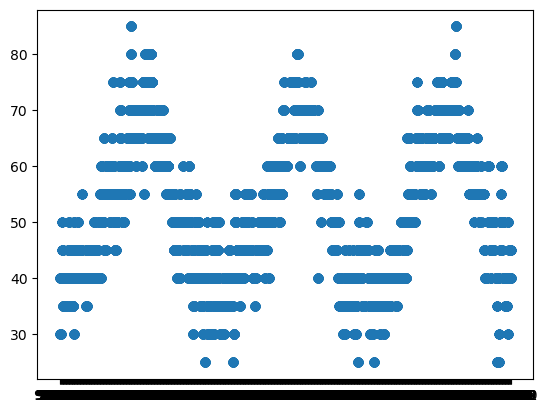

In [440]:
reg_x = weather_sun_e['Daylength']
reg_y = weather_sun_e['temp range']
plt.scatter(reg_x, reg_y)

## visualization

### Day & Night data

#### Overall calls day vs night

In [53]:
sun_eug_21_g

,reason for dispatch,day_night,date,time,city,hour and min,hour,season,sunrise,sunset,Daylength,Unnamed: 4,week
0,check welfare,0,3349,3347,3349,3347,3347,3349,3349,3349,3349,3349,3349
1,check welfare,1,4837,4837,4837,4837,4837,4837,4837,4837,4837,4837,4837
2,counseling,0,183,183,183,183,183,183,183,183,183,183,183
3,counseling,1,131,131,131,131,131,131,131,131,131,131,131
4,ems assist,0,61,61,61,61,61,61,61,61,61,61,61
5,ems assist,1,56,56,56,56,56,56,56,56,56,56,56
6,fire assist,0,27,27,27,27,27,27,27,27,27,27,27
7,fire assist,1,47,47,47,47,47,47,47,47,47,47,47
8,police assist,0,889,889,889,889,889,889,889,889,889,889,889
9,police assist,1,915,915,915,915,915,915,915,915,915,915,915


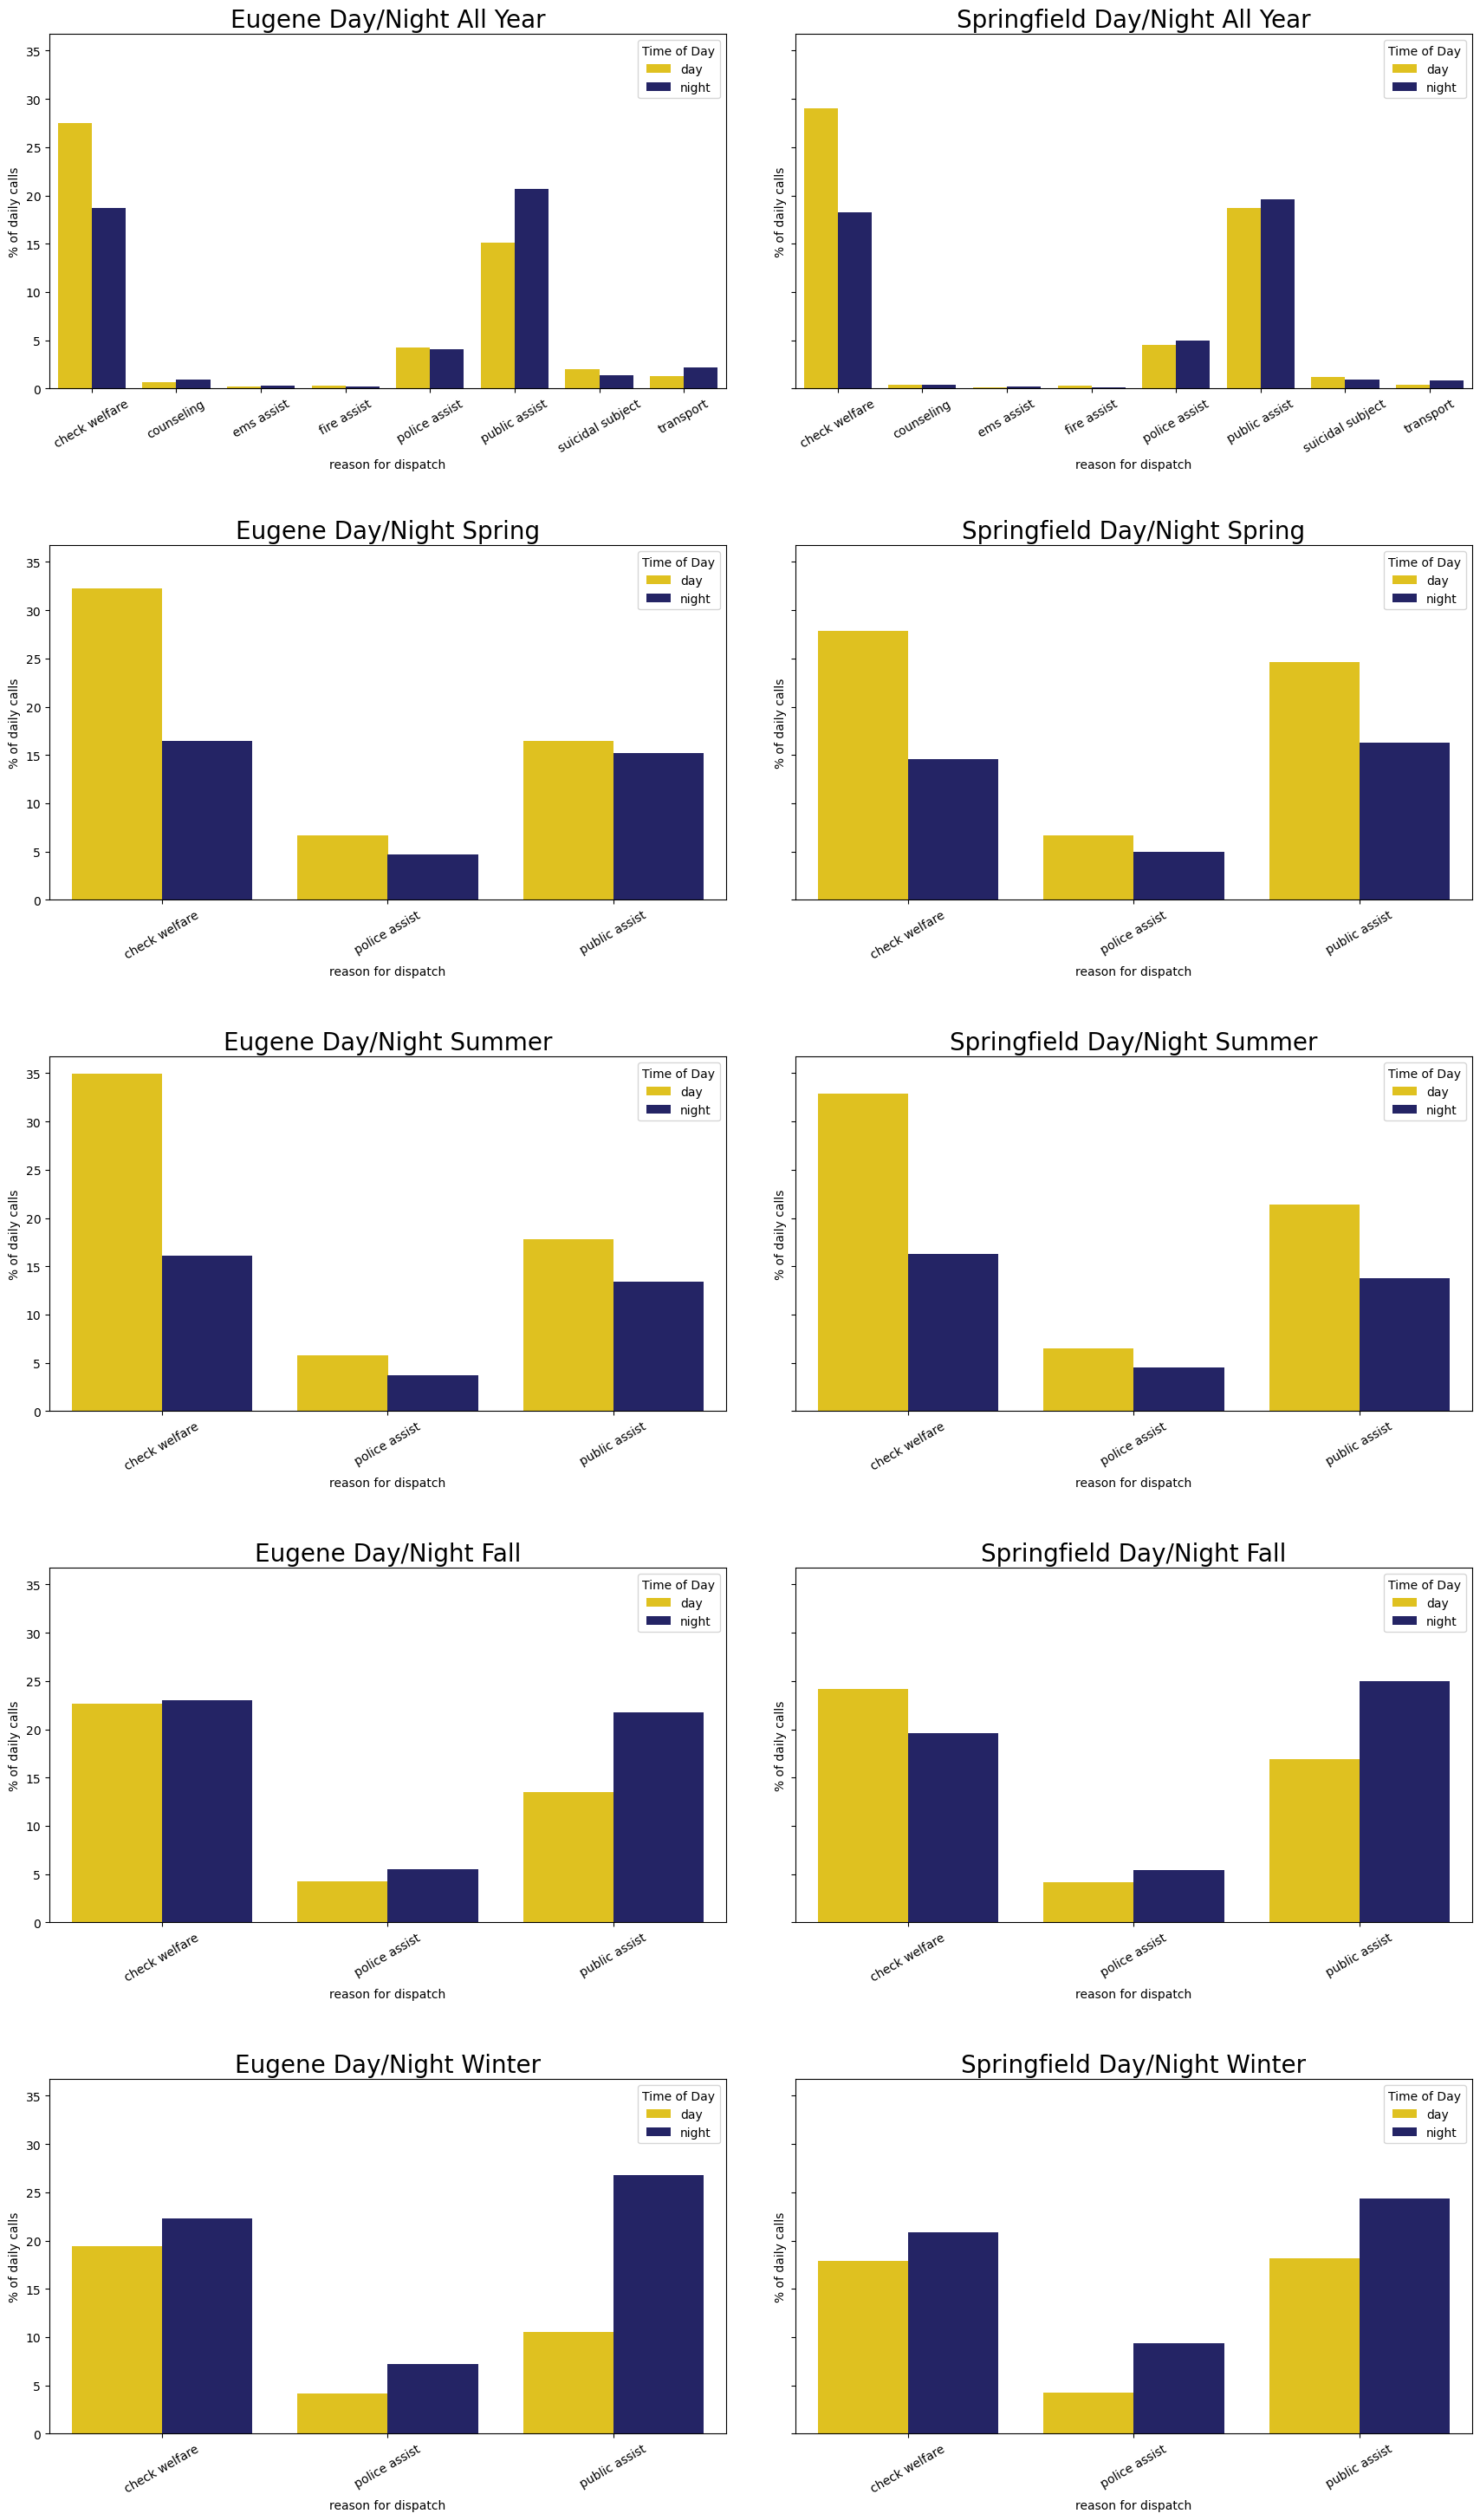

In [326]:
eug_all_grouped = eug_all_day.groupby(['reason for dispatch', 'day_night']).count().reset_index().iloc[:, 0:3].rename(columns = {'date':'# of calls'})
eug_all_grouped['% of daily calls'] = (eug_all_grouped['# of calls'] / np.sum(eug_all_grouped['# of calls'])) * 100

spr_all_grouped = spr_all_day.groupby(['reason for dispatch', 'day_night']).count().reset_index().iloc[:, 0:3].rename(columns = {'date':'# of calls'})
spr_all_grouped['% of daily calls'] = (spr_all_grouped['# of calls'] / np.sum(spr_all_grouped['# of calls'])) * 100

spring_e_dn = group_season_dn(eug_all_day, 'spring')
summer_e_dn = group_season_dn(eug_all_day, 'summer')
fall_e_dn = group_season_dn(eug_all_day, 'fall')
winter_e_dn = group_season_dn(eug_all_day, 'winter')
spring_s_dn = group_season_dn(spr_all_day, 'spring')
summer_s_dn = group_season_dn(spr_all_day, 'summer')
fall_s_dn = group_season_dn(spr_all_day, 'fall')
winter_s_dn = group_season_dn(spr_all_day, 'winter')

fig, ax = plt.subplots(5,2, figsize=(18, 30), sharey=True)


sns.barplot(data=eug_all_grouped, x='reason for dispatch', y ='% of daily calls', hue = 'day_night', palette = ('gold','midnightblue'), ax=ax[0,0])
ax[0,0].set_title('Eugene Day/Night All Year', fontsize = 20)
ax[0,0].tick_params(axis='x', rotation=30)
ax[0,0].legend(title='Time of Day')


sns.barplot(data=spr_all_grouped, x='reason for dispatch', y ='% of daily calls', hue = 'day_night', palette = ('gold','midnightblue'), ax=ax[0,1])
ax[0,1].set_title('Springfield Day/Night All Year', fontsize = 20)
ax[0,1].tick_params(axis='x', rotation=30)
ax[0,1].legend(title='Time of Day')


#Spring
sns.barplot(data=top_3(spring_e_dn), x='reason for dispatch', y ='% of daily calls', hue = 'day_night', palette = ('gold','midnightblue'), ax=ax[1,0])
ax[1,0].set_title('Eugene Day/Night Spring', fontsize = 20)
ax[1,0].tick_params(axis='x', rotation=30)
ax[1,0].legend(title='Time of Day')

sns.barplot(data=top_3(spring_s_dn), x='reason for dispatch', y ='% of daily calls', hue = 'day_night', palette = ('gold','midnightblue'), ax=ax[1,1])
ax[1,1].set_title('Springfield Day/Night Spring', fontsize = 20)
ax[1,1].tick_params(axis='x', rotation=30)
ax[1,1].legend(title='Time of Day')


#Summer
sns.barplot(data=top_3(summer_e_dn), x='reason for dispatch', y ='% of daily calls', hue = 'day_night', palette = ('gold','midnightblue'), ax=ax[2,0])
ax[2,0].set_title('Eugene Day/Night Summer', fontsize = 20)
ax[2,0].tick_params(axis='x', rotation=30)
ax[2,0].legend(title='Time of Day')

sns.barplot(data=top_3(summer_s_dn), x='reason for dispatch', y ='% of daily calls', hue = 'day_night', palette = ('gold','midnightblue'), ax=ax[2,1])
ax[2,1].set_title('Springfield Day/Night Summer', fontsize = 20)
ax[2,1].tick_params(axis='x', rotation=30)
ax[2,1].legend(title='Time of Day')

#fall
sns.barplot(data=top_3(fall_e_dn), x='reason for dispatch', y ='% of daily calls', hue = 'day_night', palette = ('gold','midnightblue'), ax=ax[3,0])
ax[3,0].set_title('Eugene Day/Night Fall', fontsize = 20)
ax[3,0].tick_params(axis='x', rotation=30)
ax[3,0].legend(title='Time of Day')

sns.barplot(data=top_3(fall_s_dn), x='reason for dispatch', y ='% of daily calls', hue = 'day_night', palette = ('gold','midnightblue'), ax=ax[3,1])
ax[3,1].set_title('Springfield Day/Night Fall', fontsize = 20)
ax[3,1].tick_params(axis='x', rotation=30)
ax[3,1].legend(title='Time of Day')

#Winter
sns.barplot(data=top_3(winter_e_dn), x='reason for dispatch', y ='% of daily calls', hue = 'day_night', palette = ('gold','midnightblue'), ax=ax[4,0])
ax[4,0].set_title('Eugene Day/Night Winter', fontsize = 20)
ax[4,0].tick_params(axis='x', rotation=30)
ax[4,0].legend(title='Time of Day')

sns.barplot(data=top_3(winter_s_dn), x='reason for dispatch', y ='% of daily calls', hue = 'day_night', palette = ('gold','midnightblue'), ax=ax[4,1])
ax[4,1].set_title('Springfield Day/Night Winter', fontsize = 20)
ax[4,1].tick_params(axis='x', rotation=30)
ax[4,1].legend(title='Time of Day')

fig.tight_layout(pad=4.0)
plt.show()

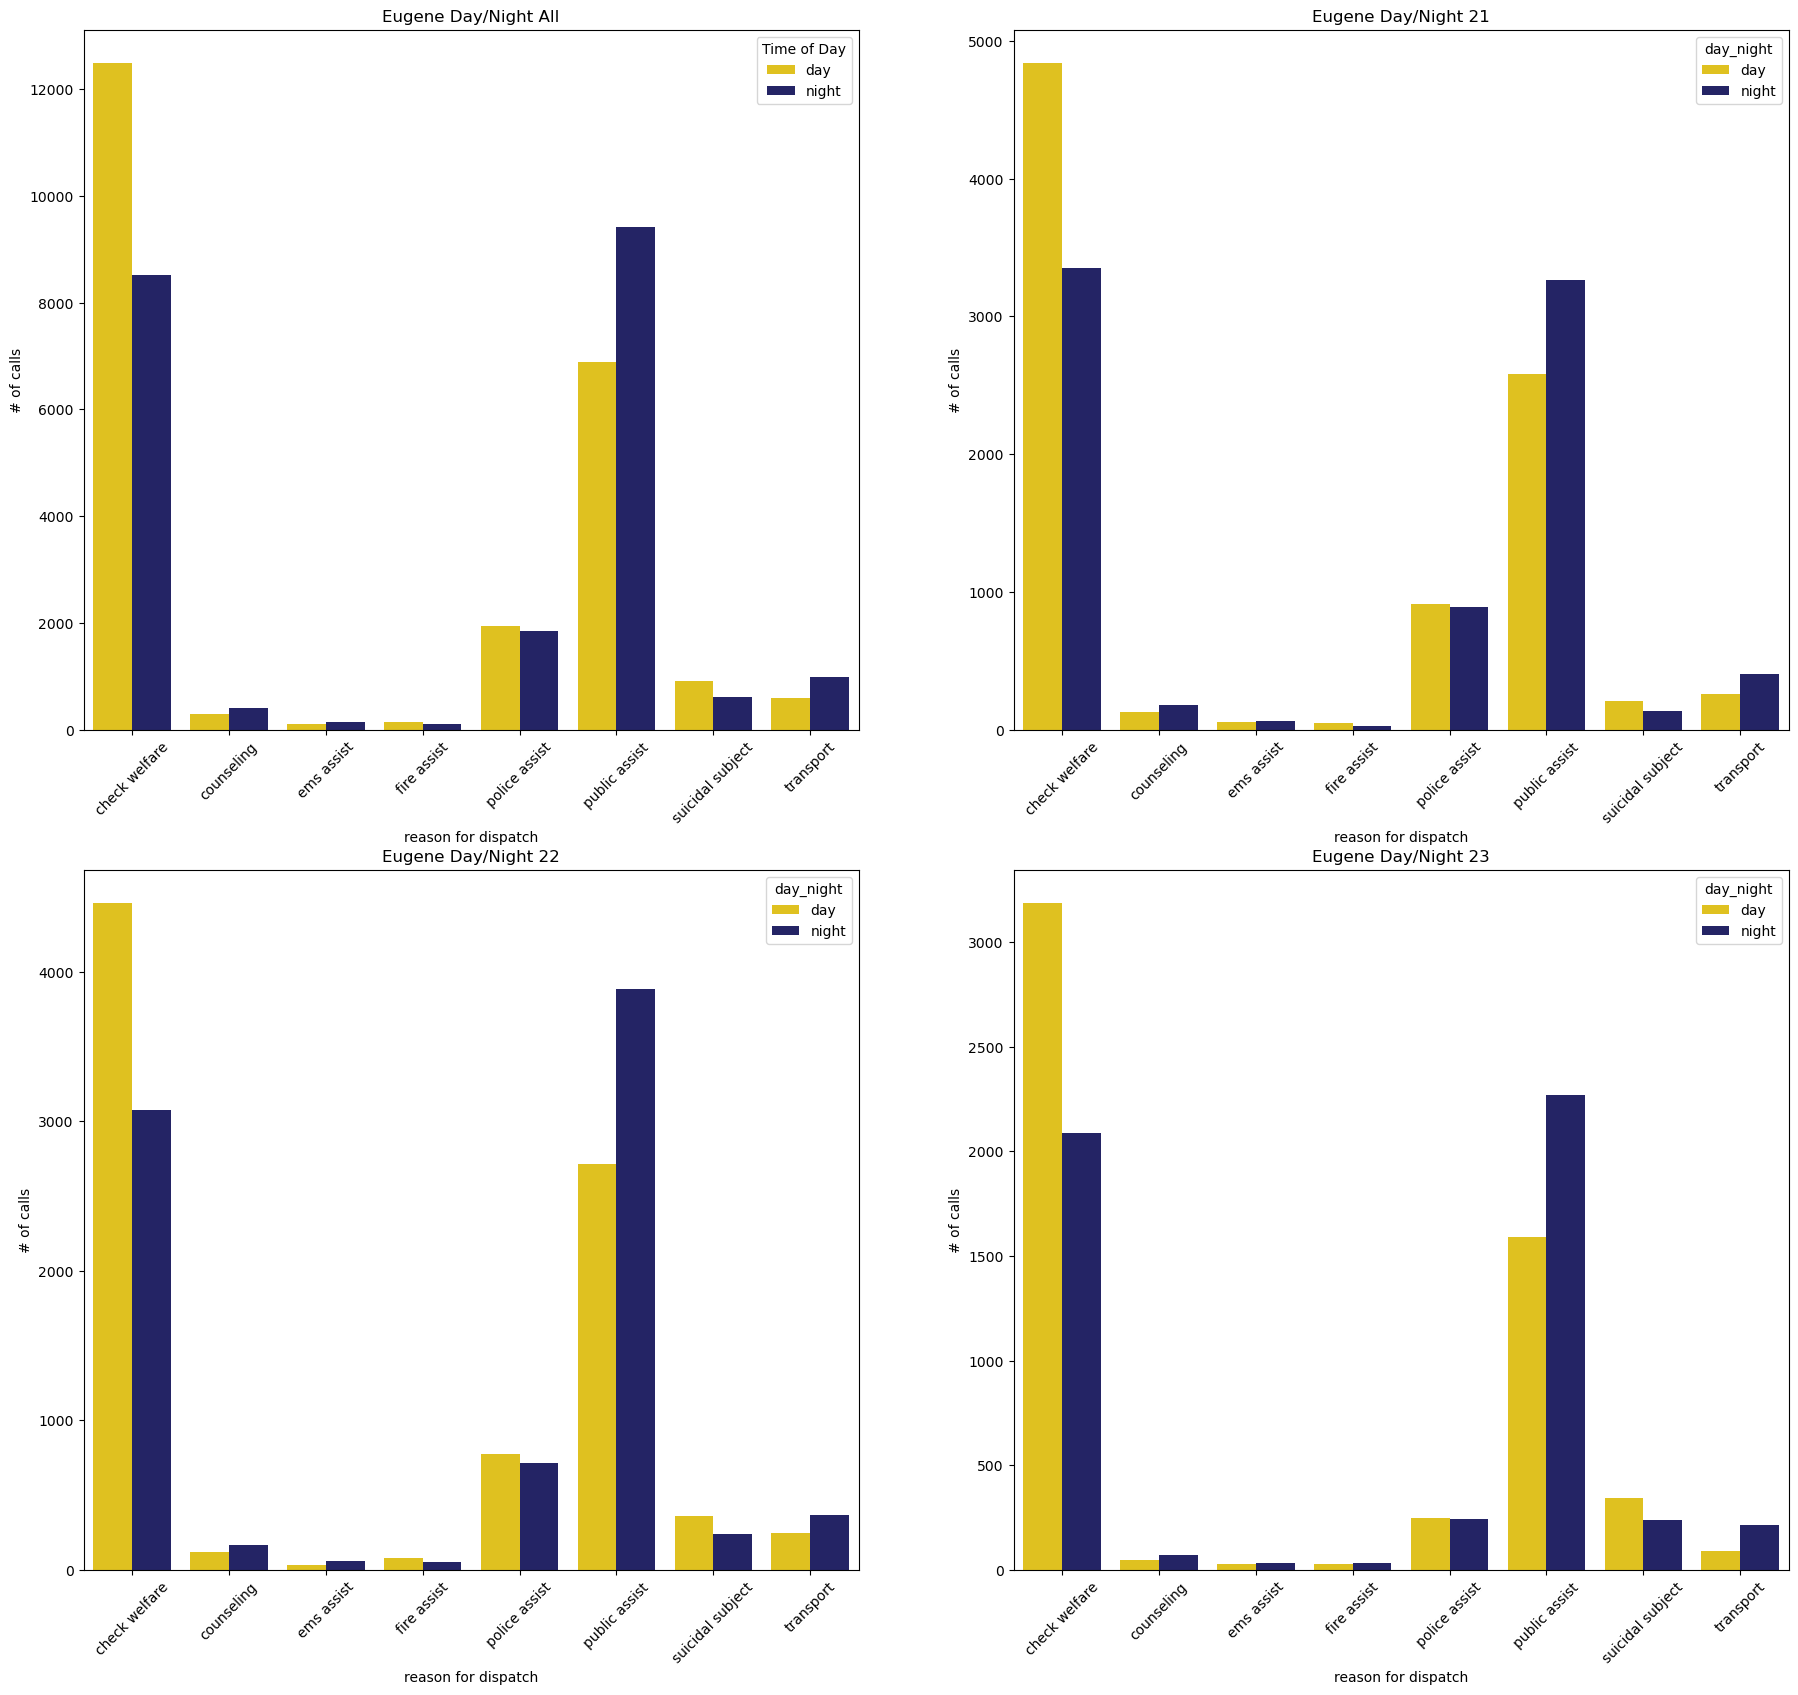

In [71]:
sun_eug_21_g, sun_eug_22_g, sun_eug_23_g = year_split_group(eug_all_day, 'day_night')

eug_all_grouped = eug_all_day.groupby(['reason for dispatch', 'day_night']).count().reset_index().iloc[:, 0:3].rename(columns = {'date':'# of calls'})


fig, ax = plt.subplots(2, 2, figsize=(22, 20))
plt.title('Overall Calls Day vs Night')


sns.barplot(data=eug_all_grouped, x='reason for dispatch', y ='# of calls', hue = 'day_night', palette = ('gold','midnightblue'), ax = ax[0][0])
ax[0][0].set_title('Eugene Day/Night All')
ax[0,0].tick_params(axis='x', rotation=45)
ax[0,0].legend(title='Time of Day')

sns.barplot(data=sun_eug_21_g, x='reason for dispatch', y ='# of calls', hue = 'day_night', palette = ('gold','midnightblue'), ax = ax[0][1])
ax[0][1].set_title('Eugene Day/Night 21')
ax[0,1].tick_params(axis='x', rotation=45)

sns.barplot(data=sun_eug_22_g, x='reason for dispatch', y ='# of calls', hue = 'day_night', palette = ('gold','midnightblue'), ax = ax[1][0])
ax[1][0].set_title('Eugene Day/Night 22')
ax[1,0].tick_params(axis='x', rotation=45)

sns.barplot(data=sun_eug_23_g, x='reason for dispatch', y ='# of calls', hue = 'day_night', palette = ('gold','midnightblue'), ax = ax[1][1])
ax[1][1].set_title('Eugene Day/Night 23')
ax[1,1].tick_params(axis='x', rotation=45)

plt.show()

## Eugene Day call data visualization (whole year)

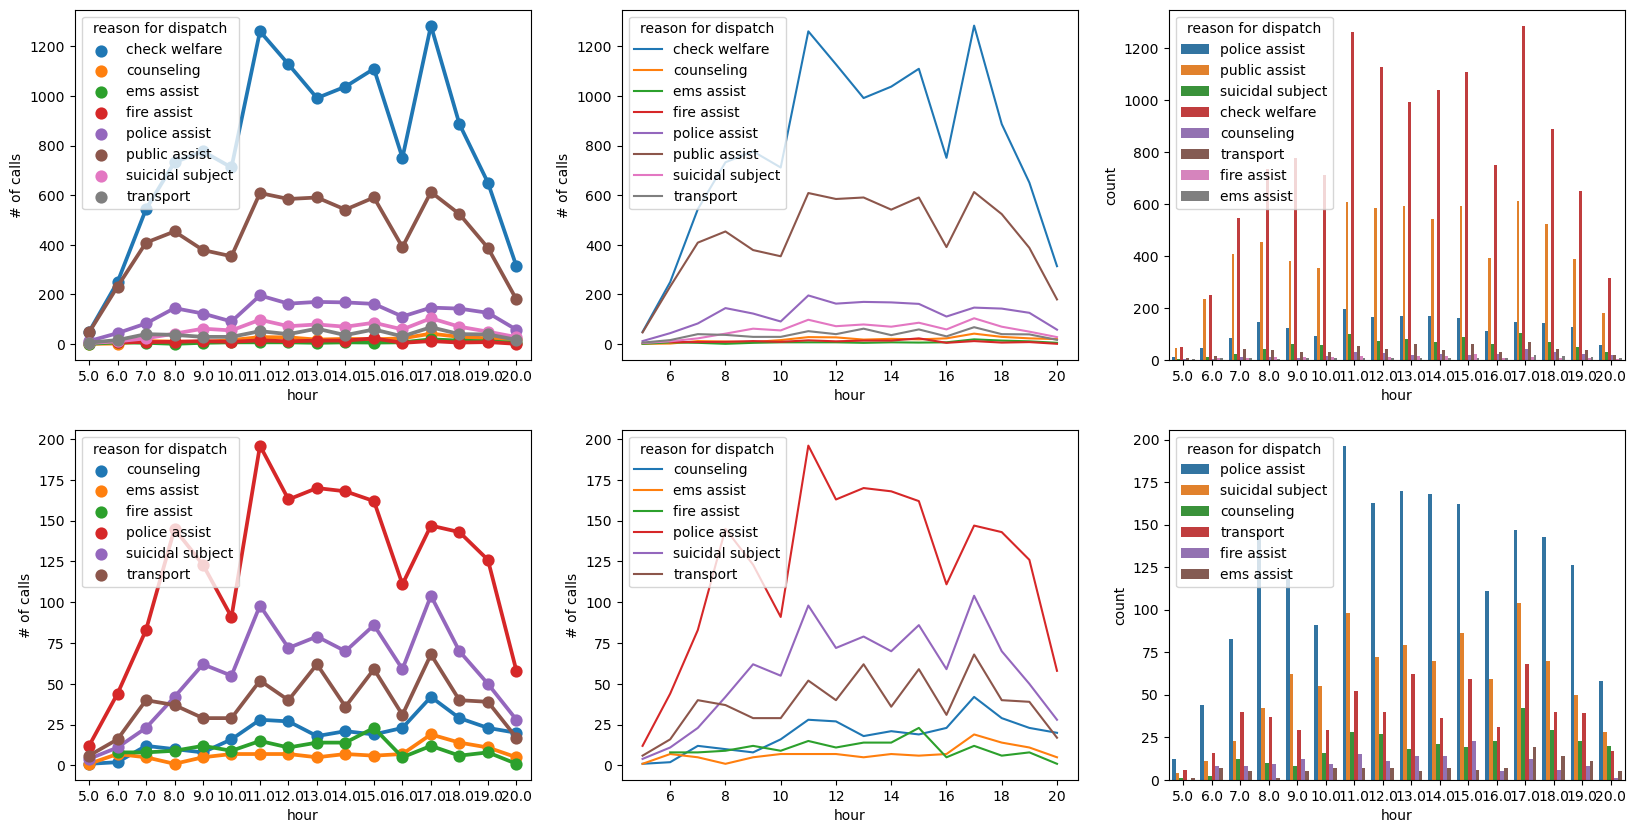

In [72]:
day_grouped = eug_day_data.groupby(['reason for dispatch', 'hour']).count().reset_index()
day_grouped = day_grouped.iloc[:, 0:3].rename(columns = {'date':'# of calls'})

fig, ax = plt.subplots(2, 3, figsize = (20, 10))

#plots of all 
sns.pointplot(day_grouped, x='hour', y= '# of calls', hue = 'reason for dispatch', ax = ax[0,0])
sns.lineplot(day_grouped, x='hour', y= '# of calls', hue = 'reason for dispatch', ax = ax[0,1])
sns.countplot(eug_day_data, x='hour', hue = 'reason for dispatch', ax = ax[0,2])

# #plots withouth public assist and check welfare
sns.pointplot(day_grouped[(day_grouped['reason for dispatch'] != 'check welfare') & (day_grouped['reason for dispatch'] != 'public assist')], x='hour', y= '# of calls', hue = 'reason for dispatch', ax = ax[1,0])
sns.lineplot(day_grouped[(day_grouped['reason for dispatch'] != 'check welfare') & (day_grouped['reason for dispatch'] != 'public assist')], x='hour', y= '# of calls', hue = 'reason for dispatch', ax = ax[1,1])
sns.countplot(eug_day_data[(eug_day_data['reason for dispatch'] != 'check welfare') & (eug_day_data['reason for dispatch'] != 'public assist')], x='hour', hue = 'reason for dispatch', ax = ax[1,2])
plt.show()

## Eugene night call data visualization (Whole year)

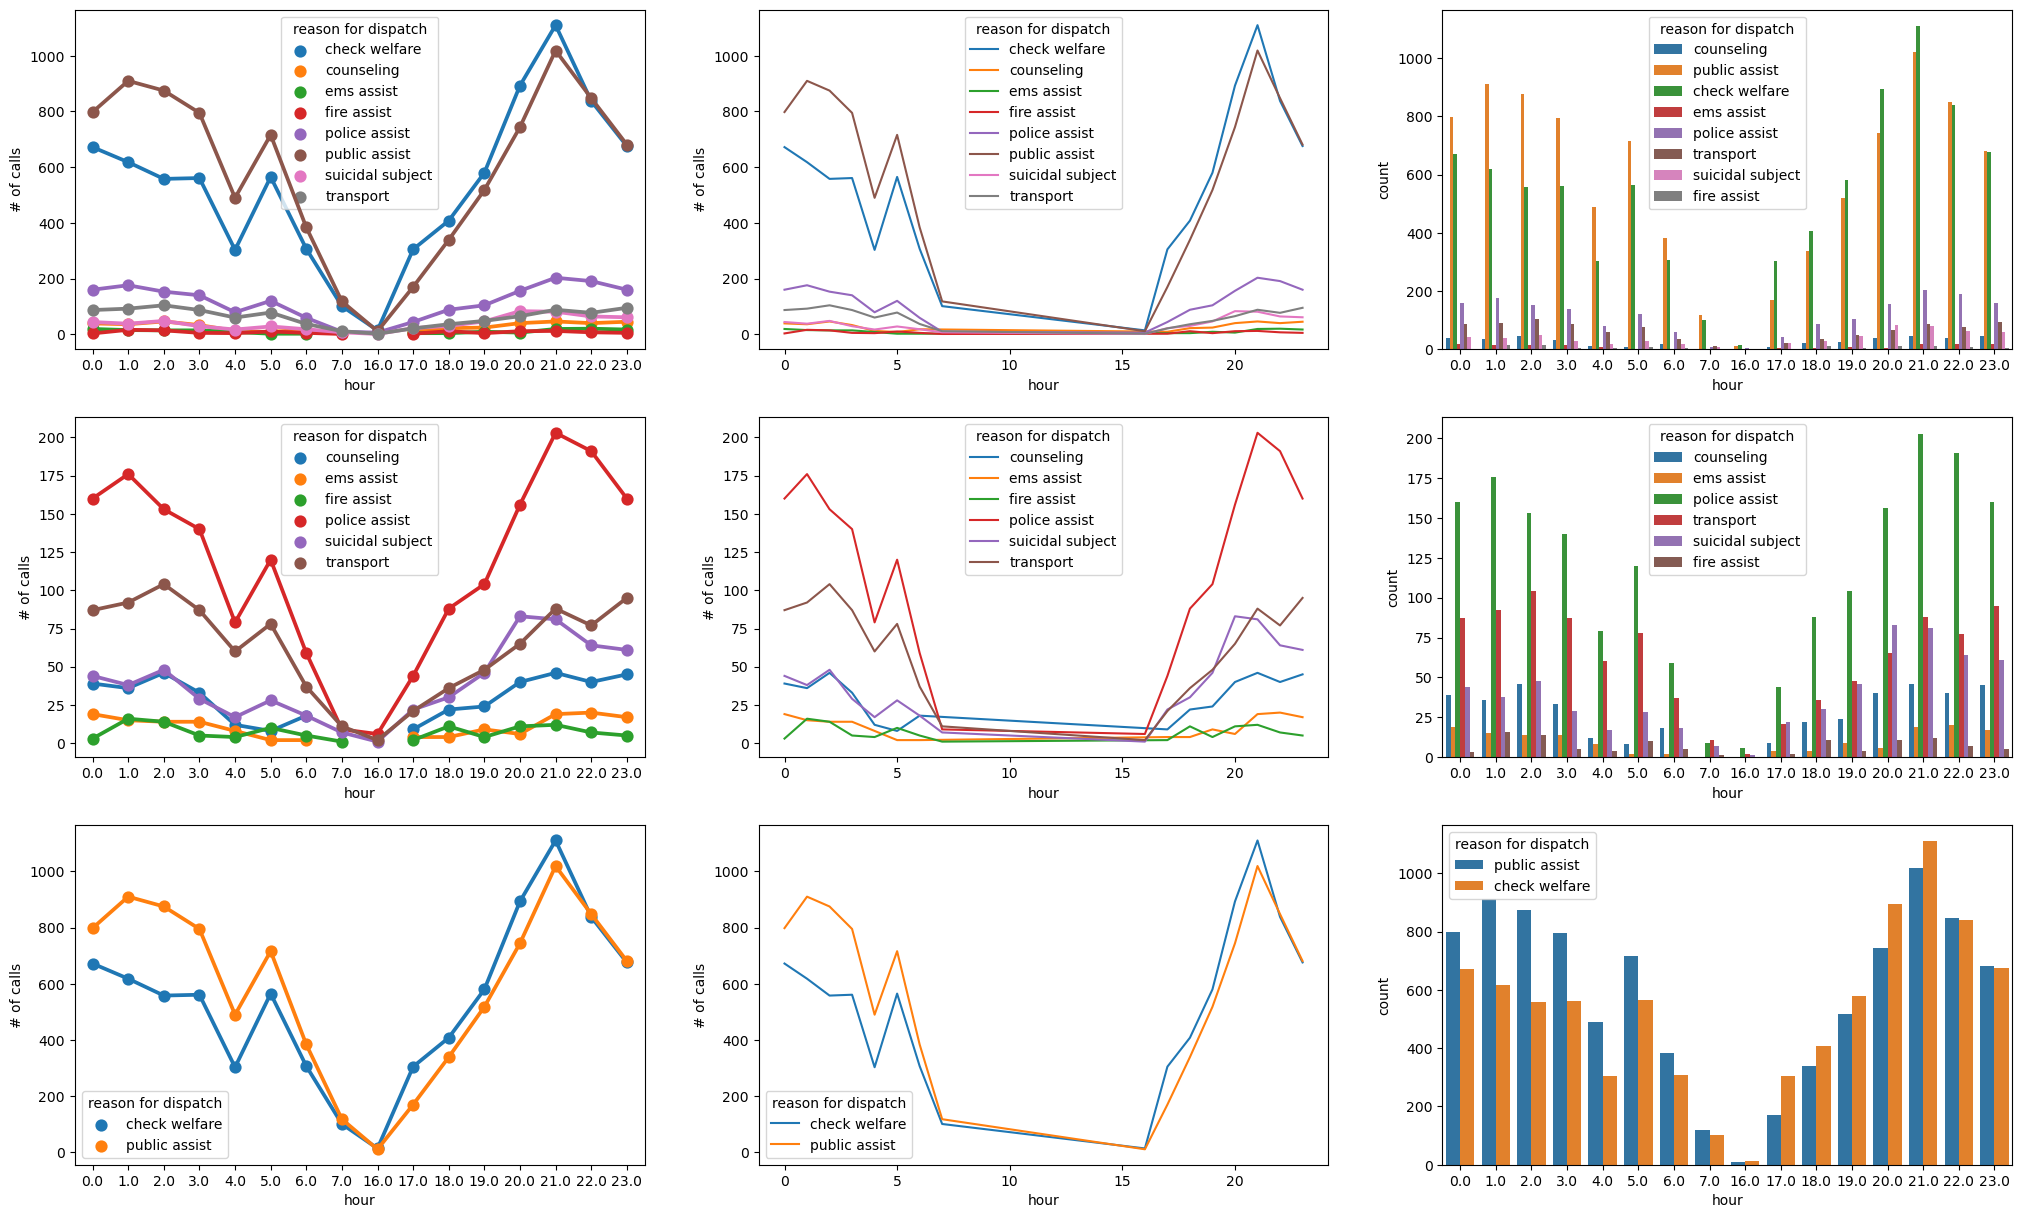

In [76]:
night_grouped = eug_night_data.groupby(['reason for dispatch', 'hour']).count().reset_index()
night_grouped = night_grouped.iloc[:, 0:3].rename(columns = {'date':'# of calls'})

fig, ax = plt.subplots(3, 3, figsize = (25, 15))

#plots of all 
sns.pointplot(night_grouped, x='hour', y= '# of calls', hue = 'reason for dispatch', ax = ax[0,0])
sns.lineplot(night_grouped, x='hour', y= '# of calls', hue = 'reason for dispatch', ax = ax[0,1])
sns.countplot(eug_night_data, x='hour', hue = 'reason for dispatch', ax = ax[0,2])

#plots without public assist and check welfare
sns.pointplot(night_grouped[(night_grouped['reason for dispatch'] != 'check welfare') & (night_grouped['reason for dispatch'] != 'public assist')], x='hour', y= '# of calls', hue = 'reason for dispatch', ax = ax[1,0])
sns.lineplot(night_grouped[(night_grouped['reason for dispatch'] != 'check welfare') & (night_grouped['reason for dispatch'] != 'public assist')], x='hour', y= '# of calls', hue = 'reason for dispatch', ax = ax[1,1])
sns.countplot(eug_night_data[(eug_night_data['reason for dispatch'] != 'check welfare') & (eug_night_data['reason for dispatch'] != 'public assist')], x='hour', hue = 'reason for dispatch', ax = ax[1,2])

#plots with only public assist and check welfare
sns.pointplot(night_grouped[(night_grouped['reason for dispatch'] == 'check welfare')  | (night_grouped['reason for dispatch'] == 'public assist')], x='hour', y= '# of calls', hue = 'reason for dispatch', ax = ax[2,0])
sns.lineplot(night_grouped[(night_grouped['reason for dispatch'] == 'check welfare')  | (night_grouped['reason for dispatch'] == 'public assist')], x='hour', y= '# of calls', hue = 'reason for dispatch', ax = ax[2,1])
sns.countplot(eug_night_data[(eug_night_data['reason for dispatch'] == 'check welfare') | (eug_night_data['reason for dispatch'] == 'public assist')], x='hour', hue = 'reason for dispatch', ax = ax[2,2])
plt.show()

## day call data visualization (seasons)

In [79]:
spring_day_e = group_season(eug_day_data, 'spring')
summer_day_e = group_season(eug_day_data, 'summer')
fall_day_e = group_season(eug_day_data, 'fall')
winter_day_e = group_season(eug_day_data, 'winter')

spring_day_s = group_season(spr_day_data, 'spring')
summer_day_s = group_season(spr_day_data, 'summer')
fall_day_s = group_season(spr_day_data, 'fall')
winter_day_s = group_season(spr_day_data, 'winter')


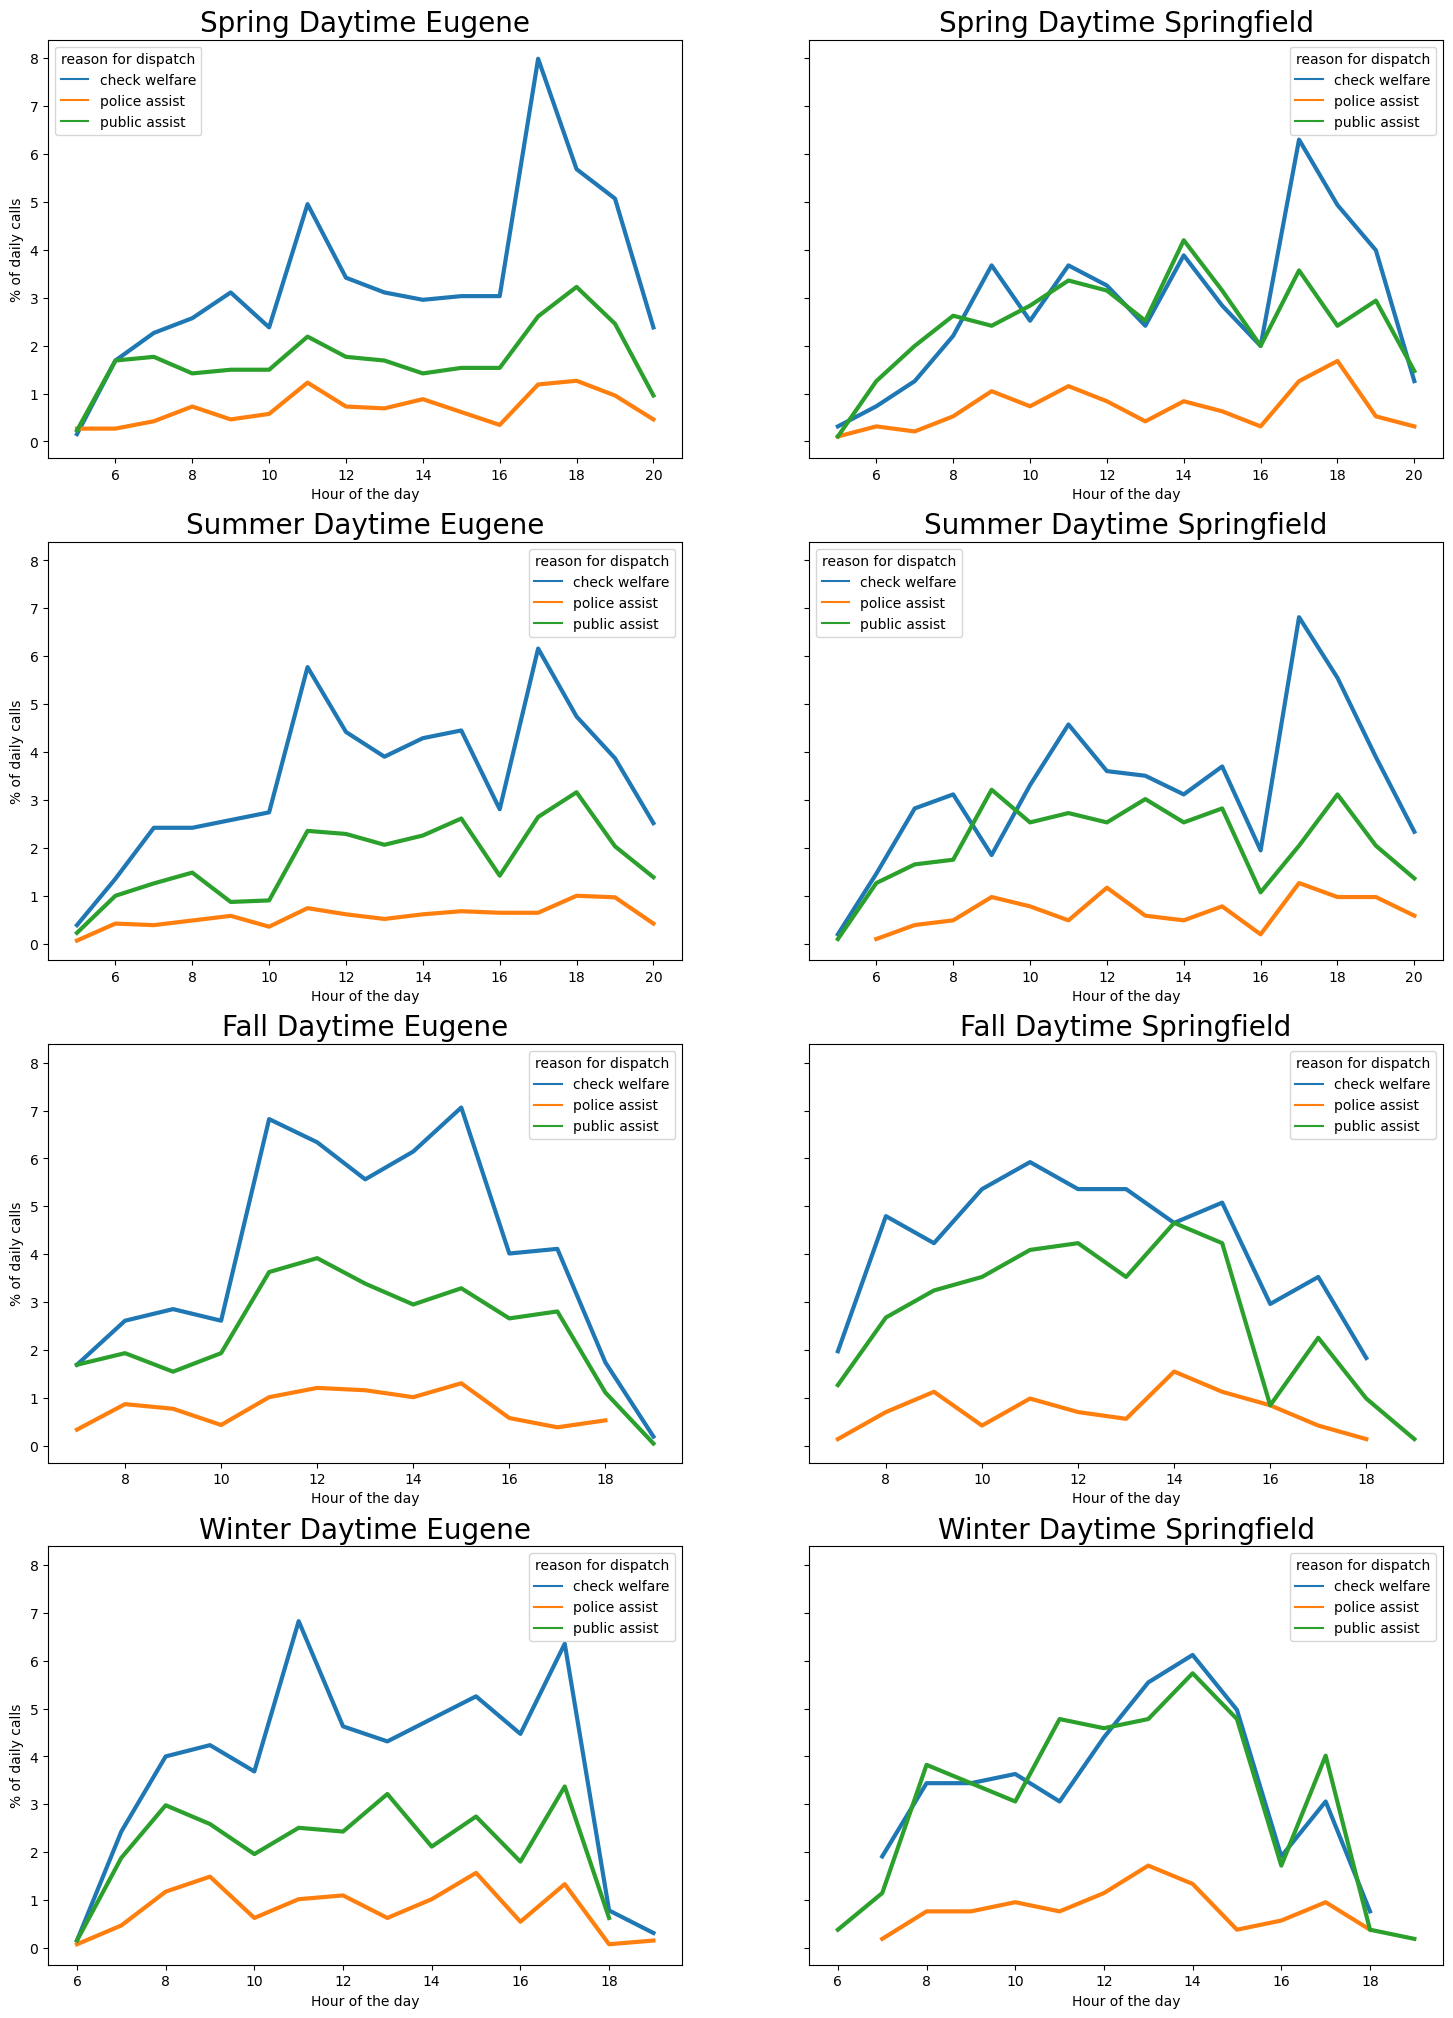

In [286]:
fig, ax = plt.subplots(4, 2, figsize=(18, 25), sharey=True)

#spring
sns.lineplot(top_3(spring_day_e), x='hour', y= '% of daily calls', hue = 'reason for dispatch', ax = ax[0,0] ,linewidth = 3)
sns.lineplot(top_3(spring_day_s), x='hour', y= '% of daily calls', hue = 'reason for dispatch', ax = ax[0,1],linewidth = 3)
ax[0,0].set_title('Spring Daytime Eugene', fontsize = 20)
ax[0,1].set_title('Spring Daytime Springfield', fontsize = 20)
ax[0,0].set_xlabel('Hour of the day')
ax[0,1].set_xlabel('Hour of the day')

#summer
sns.lineplot(top_3(summer_day_e), x='hour', y= '% of daily calls', hue = 'reason for dispatch', ax = ax[1,0],linewidth = 3)
sns.lineplot(top_3(summer_day_s), x='hour', y= '% of daily calls', hue = 'reason for dispatch', ax = ax[1,1],linewidth = 3)
ax[1,0].set_title('Summer Daytime Eugene', fontsize = 20)
ax[1,1].set_title('Summer Daytime Springfield', fontsize = 20)
ax[1,0].set_xlabel('Hour of the day')
ax[1,1].set_xlabel('Hour of the day')

#fall
sns.lineplot(top_3(fall_day_e), x='hour', y= '% of daily calls', hue = 'reason for dispatch', ax = ax[2,0],linewidth = 3)
sns.lineplot(top_3(fall_day_s), x='hour', y= '% of daily calls', hue = 'reason for dispatch', ax = ax[2,1],linewidth = 3)
ax[2,0].set_title('Fall Daytime Eugene', fontsize = 20)
ax[2,1].set_title('Fall Daytime Springfield', fontsize = 20)
ax[2,0].set_xlabel('Hour of the day')
ax[2,1].set_xlabel('Hour of the day')

#winter
sns.lineplot(top_3(winter_day_e), x='hour', y= '% of daily calls', hue = 'reason for dispatch', ax = ax[3,0],linewidth = 3)
sns.lineplot(top_3(winter_day_s), x='hour', y= '% of daily calls', hue = 'reason for dispatch', ax = ax[3,1],linewidth = 3)
ax[3,0].set_title('Winter Daytime Eugene', fontsize = 20)
ax[3,1].set_title('Winter Daytime Springfield', fontsize = 20)
ax[3,0].set_xlabel('Hour of the day')
ax[3,1].set_xlabel('Hour of the day')
plt.show()

## Night call data visualization (seasons)

In [287]:
spring_night_e = group_season(eug_night_data, 'spring')
summer_night_e = group_season(eug_night_data, 'summer')
fall_night_e = group_season(eug_night_data, 'fall')
winter_night_e = group_season(eug_night_data, 'winter')

spring_night_s = group_season(spr_night_data, 'spring')
summer_night_s = group_season(spr_night_data, 'summer')
fall_night_s = group_season(spr_night_data, 'fall')
winter_night_s = group_season(spr_night_data, 'winter')

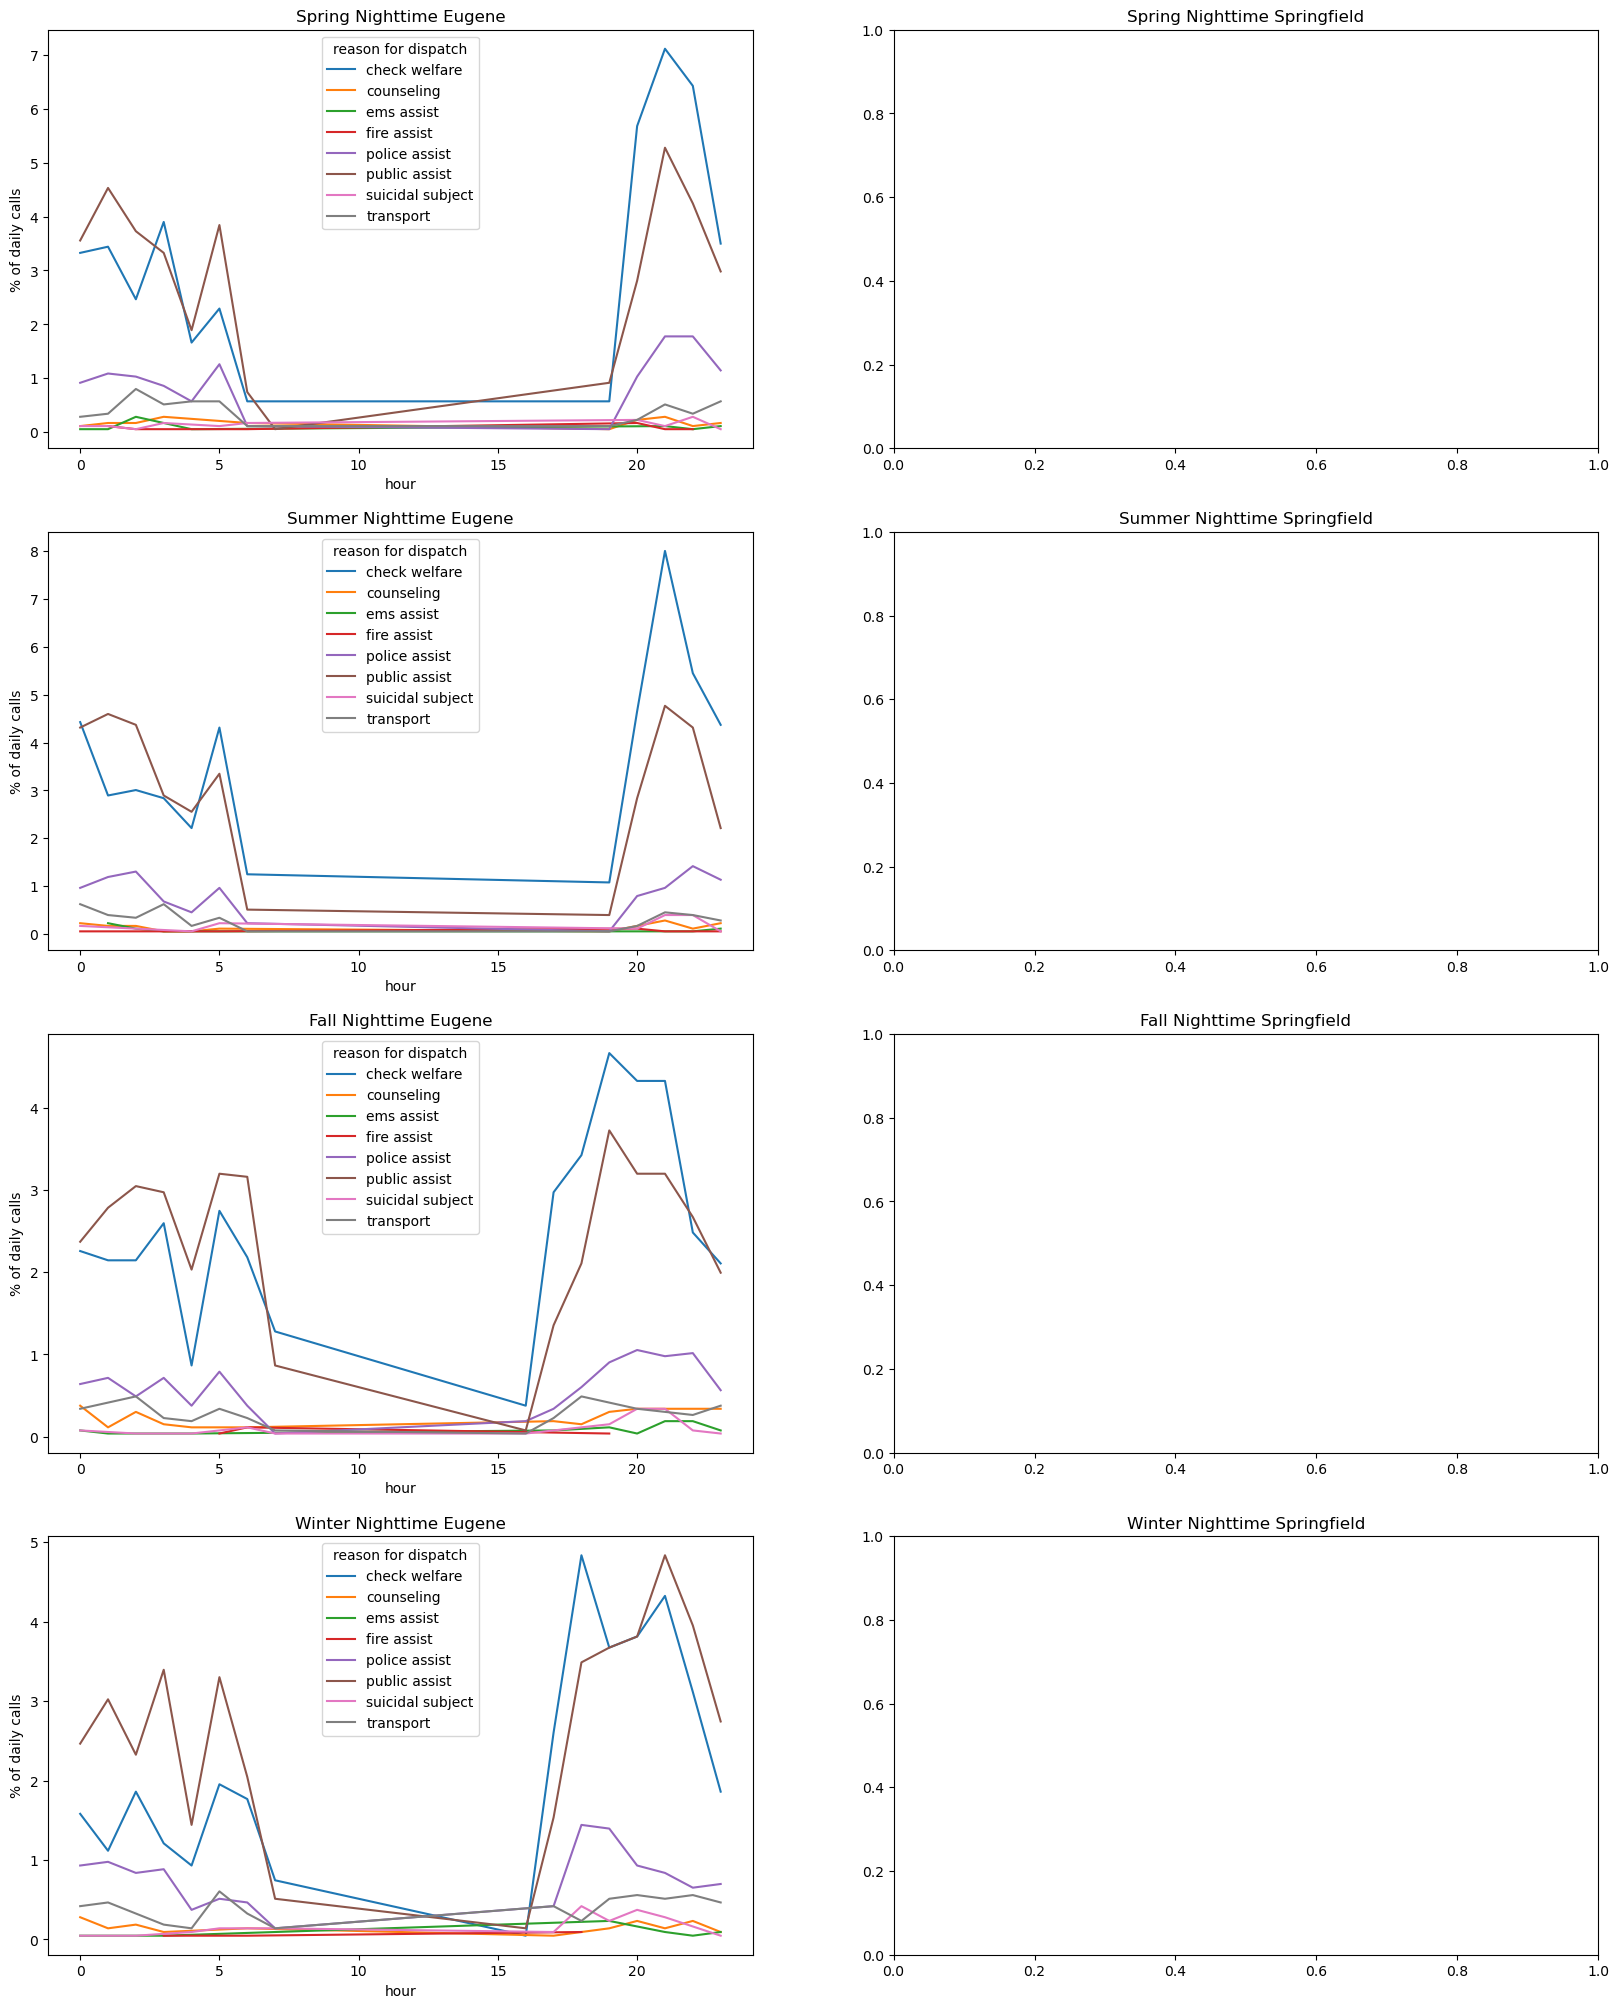

In [288]:
fig, ax = plt.subplots(4, 2, figsize=(20, 25))

#spring
sns.lineplot(spring_night_e, x='hour', y= '% of daily calls', hue = 'reason for dispatch', ax = ax[0,0])
sns.lineplot(spring_night_s, x='hour', y= '% of daily calls', hue = 'reason for dispatch', ax = ax[0,1])
ax[0,0].set_title('Spring Nighttime Eugene')
ax[0,1].set_title('Spring Nighttime Springfield')

#summer
sns.lineplot(summer_night_e, x='hour', y= '% of daily calls', hue = 'reason for dispatch', ax = ax[1,0])
sns.lineplot(summer_night_s, x='hour', y= '% of daily calls', hue = 'reason for dispatch', ax = ax[1,1])
ax[1,0].set_title('Summer Nighttime Eugene')
ax[1,1].set_title('Summer Nighttime Springfield')

#fall
sns.lineplot(fall_night_e, x='hour', y= '% of daily calls', hue = 'reason for dispatch', ax = ax[2,0])
sns.lineplot(fall_night_s, x='hour', y= '% of daily calls', hue = 'reason for dispatch', ax = ax[2,1])
ax[2,0].set_title('Fall Nighttime Eugene')
ax[2,1].set_title('Fall Nighttime Springfield')

#winter
sns.lineplot(winter_night_e, x='hour', y= '% of daily calls', hue = 'reason for dispatch', ax = ax[3,0])
sns.lineplot(winter_night_s, x='hour', y= '% of daily calls', hue = 'reason for dispatch', ax = ax[3,1])
ax[3,0].set_title('Winter Nighttime Eugene')
ax[3,1].set_title('Winter Nighttime Springfield')

plt.show()

## All day data visualization (seasons)

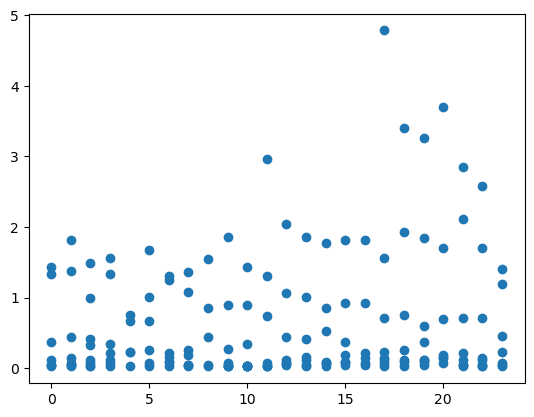

In [445]:
spring_e = group_season(eug_all_day, 'spring')
summer_e = group_season(eug_all_day, 'summer')
fall_e = group_season(eug_all_day, 'fall')
winter_e = group_season(eug_all_day, 'winter')
spring_s = group_season(spr_all_day, 'spring')
summer_s = group_season(spr_all_day, 'summer')
fall_s = group_season(spr_all_day, 'fall')
winter_s = group_season(spr_all_day, 'winter')

x = spring_e['hour']
y = spring_e['% of daily calls']
plt.scatter(x, y)

In [447]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(np.array(x).reshape(-1,1), y)

LinearRegression()

In [453]:
c = lr.intercept_
m = lr.coef_[0]
c, m

(0.4083234610357649, 0.015384814700160952)

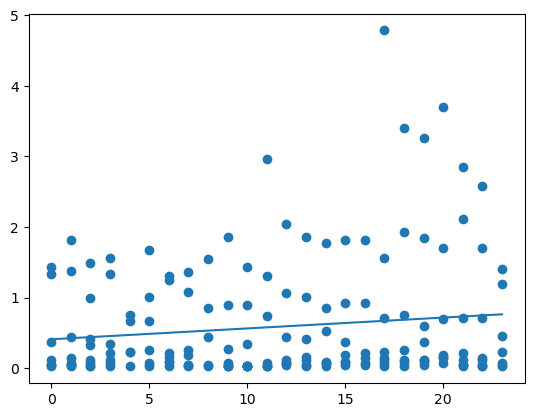

In [459]:
y_pred = lr.predict(np.array(x).reshape(-1,1))
plt.plot(x, y_pred)
plt.scatter(x, y)

In [397]:
spring_e

,reason for dispatch,hour,# of calls,% of daily calls
0,check welfare,0.0,58,1.334254
1,check welfare,1.0,60,1.380262
2,check welfare,2.0,43,0.989188
3,check welfare,3.0,68,1.564297
4,check welfare,4.0,29,0.667127
...,...,...,...,...
165,transport,19.0,16,0.368070
166,transport,20.0,7,0.161031
167,transport,21.0,9,0.207039
168,transport,22.0,6,0.138026


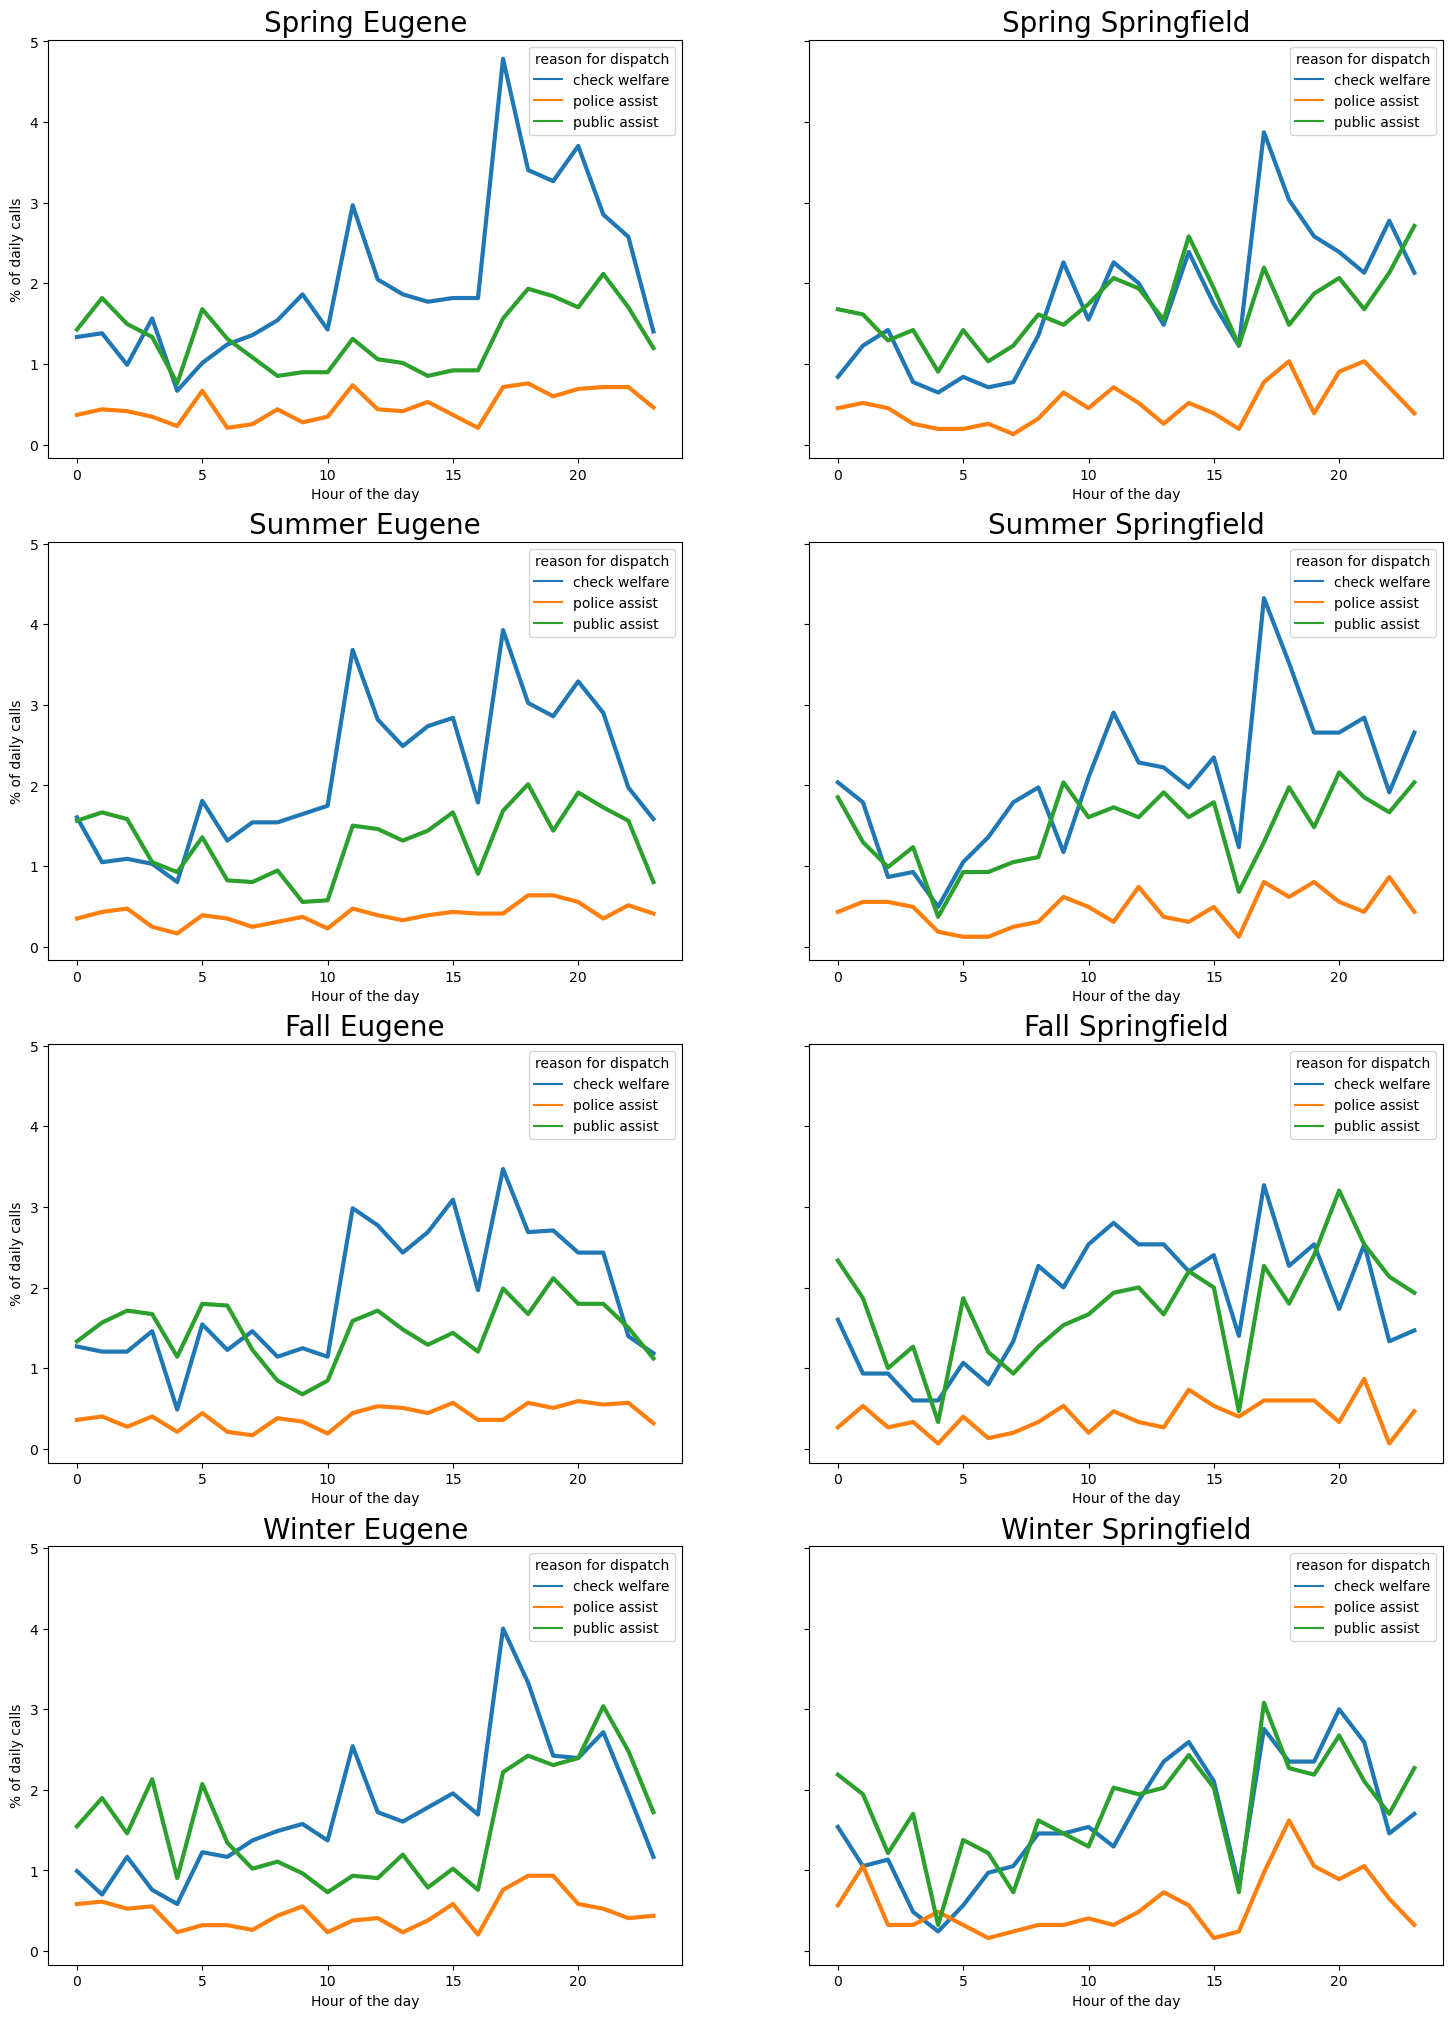

In [282]:
fig, ax = plt.subplots(4, 2, figsize=(18, 25), sharey=True)

sns.lineplot(top_3(spring_e), x='hour', y= '% of daily calls', hue = 'reason for dispatch', ax = ax[0,0], linewidth = 3)
ax[0,0].set_title('Spring Eugene', fontsize = 20)
ax[0,0].set_xlabel('Hour of the day')

sns.lineplot(top_3(summer_e), x='hour', y= '% of daily calls', hue = 'reason for dispatch', ax = ax[1,0],linewidth = 3)
ax[1,0].set_title('Summer Eugene', fontsize = 20)
ax[1,0].set_xlabel('Hour of the day')

sns.lineplot(top_3(fall_e), x='hour', y= '% of daily calls', hue = 'reason for dispatch', ax = ax[2,0],linewidth = 3)
ax[2,0].set_title('Fall Eugene', fontsize = 20)
ax[2,0].set_xlabel('Hour of the day')

sns.lineplot(top_3(winter_e), x='hour', y= '% of daily calls', hue = 'reason for dispatch', ax = ax[3,0],linewidth = 3)
ax[3,0].set_title('Winter Eugene',fontsize = 20)
ax[3,0].set_xlabel('Hour of the day')

sns.lineplot(top_3(spring_s), x='hour', y= '% of daily calls', hue = 'reason for dispatch', ax = ax[0,1], linewidth = 3)
ax[0,1].set_title('Spring Springfield', fontsize = 20)
ax[0,1].set_xlabel('Hour of the day')

sns.lineplot(top_3(summer_s), x='hour', y= '% of daily calls', hue = 'reason for dispatch', ax = ax[1,1],linewidth = 3)
ax[1,1].set_title('Summer Springfield', fontsize = 20)
ax[1,1].set_xlabel('Hour of the day')

sns.lineplot(top_3(fall_s), x='hour', y= '% of daily calls', hue = 'reason for dispatch', ax = ax[2,1],linewidth = 3)
ax[2,1].set_title('Fall Springfield', fontsize = 20)
ax[2,1].set_xlabel('Hour of the day')

sns.lineplot(top_3(winter_s), x='hour', y= '% of daily calls', hue = 'reason for dispatch', ax = ax[3,1],linewidth = 3)
ax[3,1].set_title('Winter Springfield',fontsize = 20)
ax[3,1].set_xlabel('Hour of the day')

plt.show()

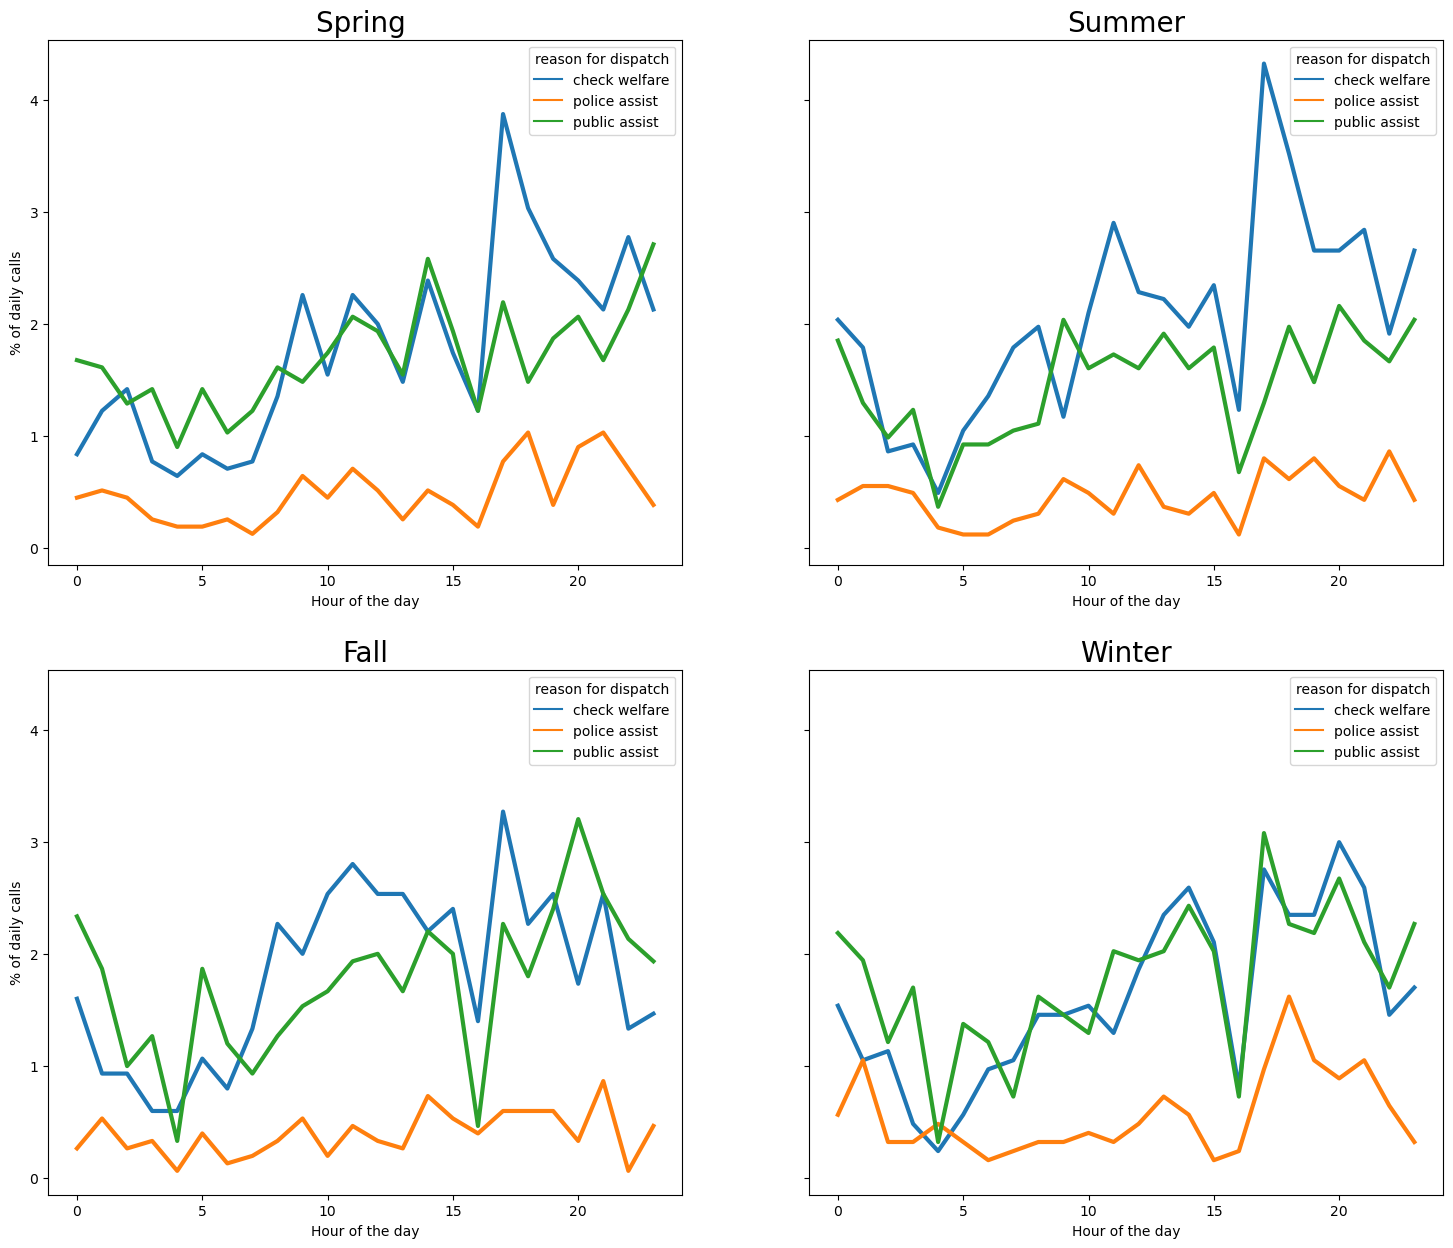

In [276]:
#Springfield 
fig, ax = plt.subplots(2, 2, figsize=(18, 15), sharey=True)

sns.lineplot(top_3(spring_s), x='hour', y= '% of daily calls', hue = 'reason for dispatch', ax = ax[0,0], linewidth = 3)
ax[0,0].set_title('Spring ', fontsize = 20)
ax[0,0].set_xlabel('Hour of the day')

sns.lineplot(top_3(summer_s), x='hour', y= '% of daily calls', hue = 'reason for dispatch', ax = ax[0,1],linewidth = 3)
ax[0,1].set_title('Summer', fontsize = 20)
ax[0,1].set_xlabel('Hour of the day')

sns.lineplot(top_3(fall_s), x='hour', y= '% of daily calls', hue = 'reason for dispatch', ax = ax[1,0],linewidth = 3)
ax[1,0].set_title('Fall', fontsize = 20)
ax[1,0].set_xlabel('Hour of the day')

sns.lineplot(top_3(winter_s), x='hour', y= '% of daily calls', hue = 'reason for dispatch', ax = ax[1,1],linewidth = 3)
ax[1,1].set_title('Winter',fontsize = 20)
ax[1,1].set_xlabel('Hour of the day')

plt.show()

## Weather Visualization



weather_group = weather_total.groupby(['reason for dispatch', 'temp_avg', 'city', 'season']).count().reset_index()
weather_group

In [486]:
weather_spring_e, weather_summer_e, weather_fall_e, weather_winter_e = season_split(weather_group[weather_group['city'] == 'eugene'])
weather_spring_s, weather_summer_s, weather_fall_s, weather_winter_s = season_split(weather_group[weather_group['city'] == 'springfield'])


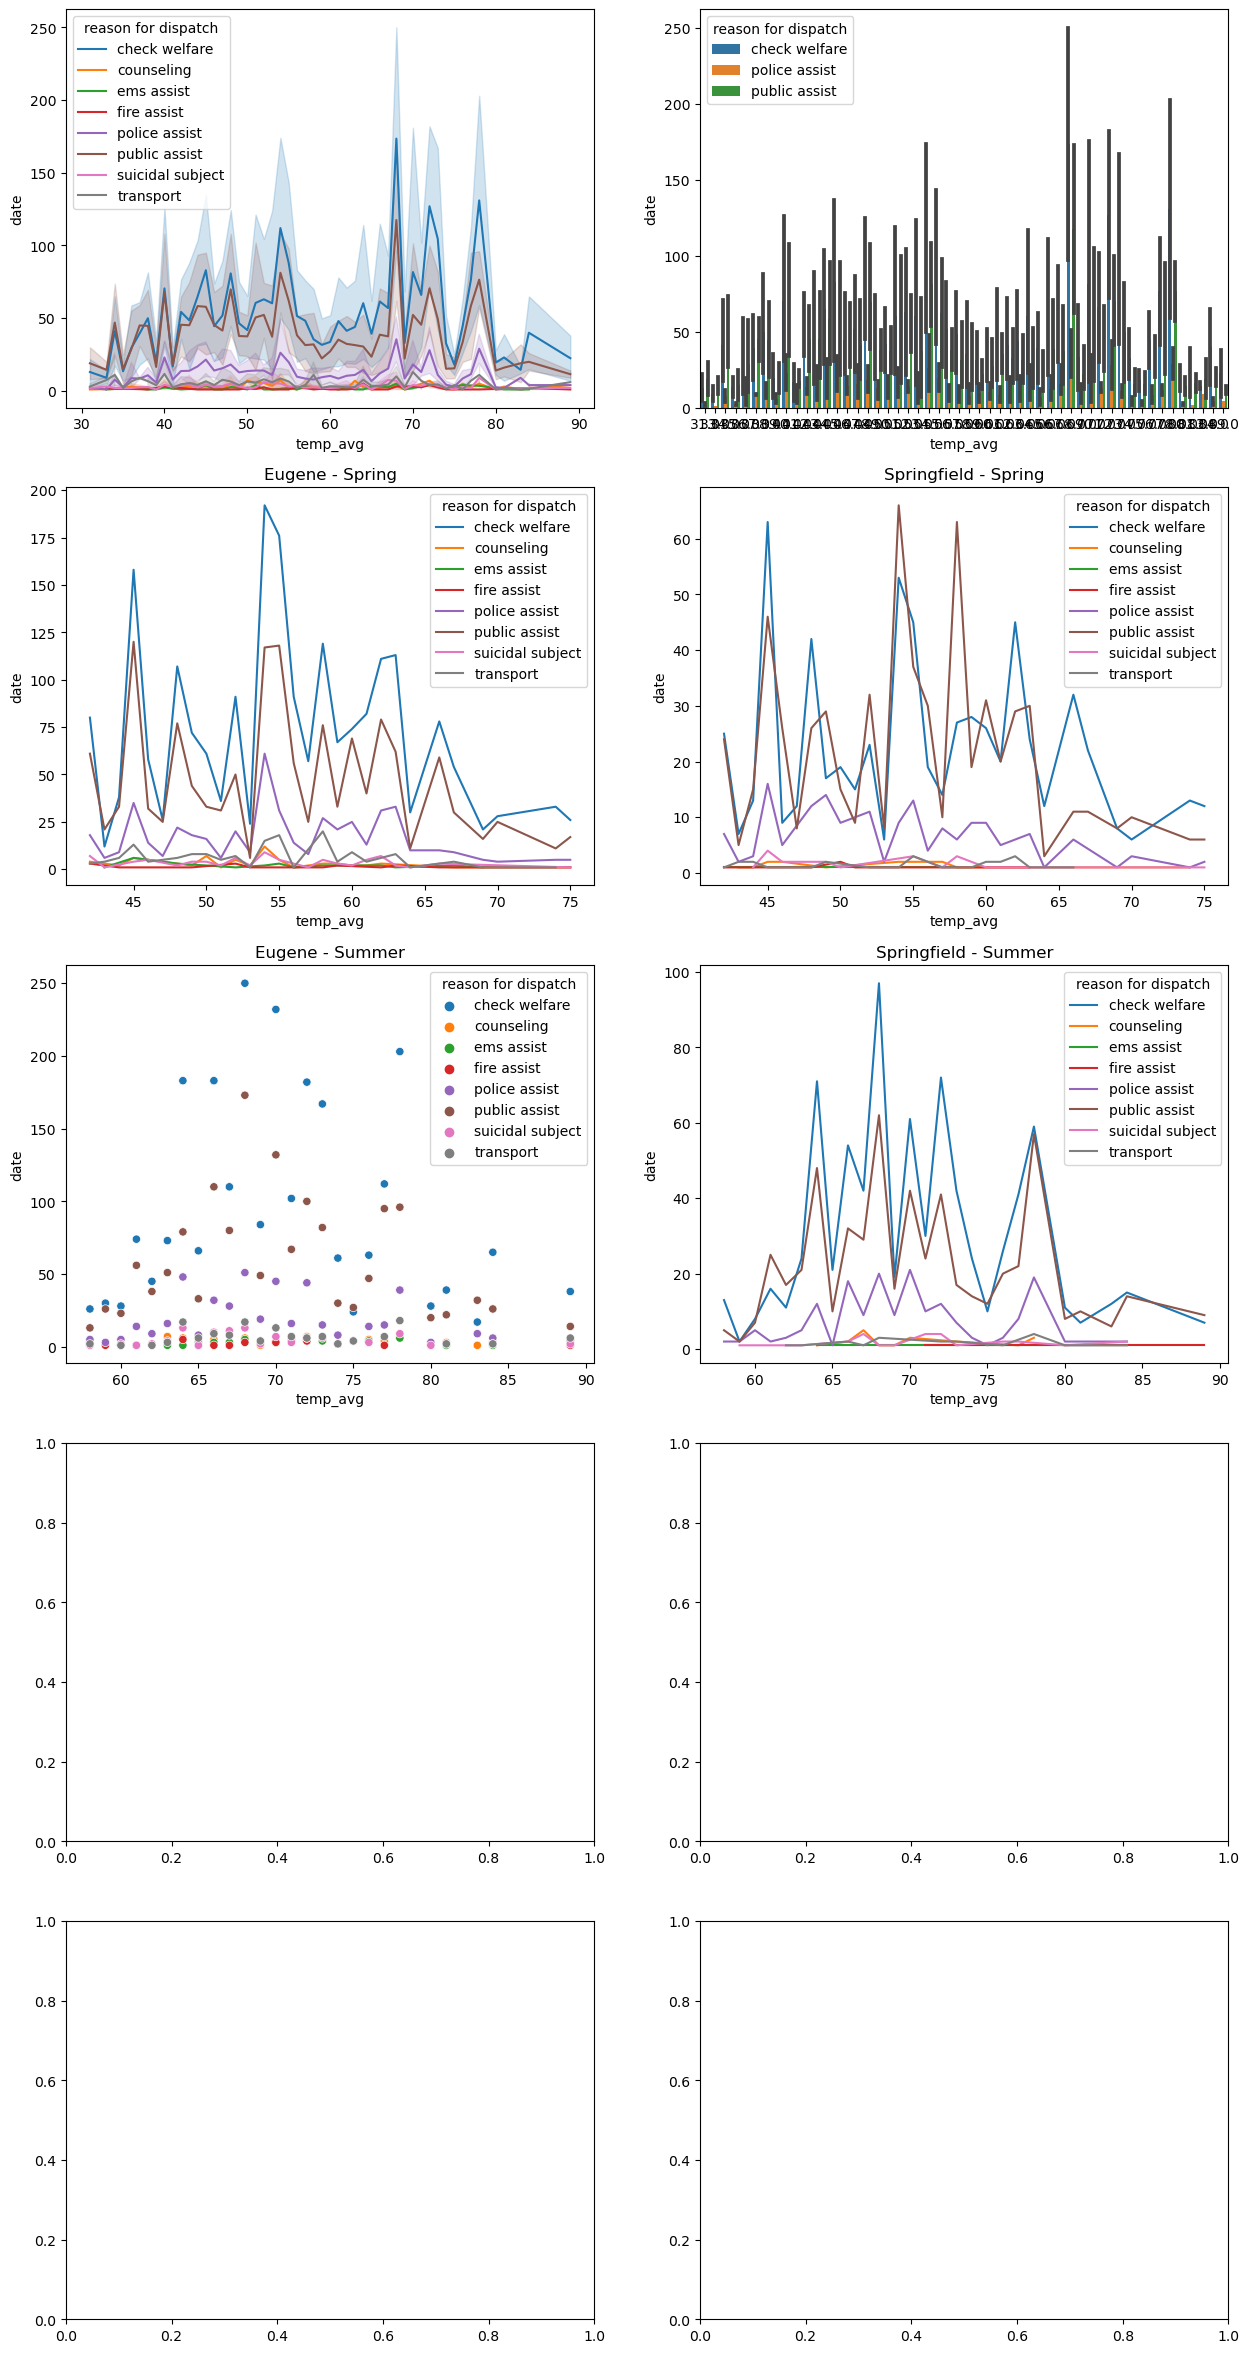

In [487]:
fig, ax = plt.subplots(5,2, figsize = (15, 30))

sns.lineplot(weather_group, x='temp_avg', y = 'date', hue = 'reason for dispatch', ax = ax[0,0])
sns.barplot(top_3(weather_group), x='temp_avg', y = 'date', hue = 'reason for dispatch', ax = ax[0,1])

#spring
sns.lineplot(weather_spring_e, x='temp_avg', y='date', hue = 'reason for dispatch', ax = ax[1,0])
sns.lineplot(weather_spring_s, x='temp_avg', y='date', hue = 'reason for dispatch', ax = ax[1,1])
ax[1,0].set_title('Eugene - Spring')
ax[1,1].set_title('Springfield - Spring')

#summer
sns.scatterplot(weather_summer_e, x='temp_avg', y='date', hue = 'reason for dispatch', ax = ax[2,0])
sns.lineplot(weather_summer_s, x='temp_avg', y='date', hue = 'reason for dispatch', ax = ax[2,1])
ax[2,0].set_title('Eugene - Summer')
ax[2,1].set_title('Springfield - Summer')

plt.show()

,reason for dispatch,temp_min,date,time,city,hour and min,hour,season,temp_max (f),temp_avg,precipitation (in),below freeze
0,check welfare,0.0,54,54,54,54,54,0,54,54,54,54
1,check welfare,19.0,34,34,34,34,34,0,34,34,34,34
2,check welfare,21.0,57,57,57,57,57,0,57,57,57,57
3,check welfare,22.0,143,143,143,143,143,0,143,143,143,143
4,check welfare,23.0,45,45,45,45,45,26,45,45,45,45
...,...,...,...,...,...,...,...,...,...,...,...,...
97,transport,28.0,17,17,17,17,17,7,17,17,17,17
98,transport,29.0,19,19,19,19,19,7,19,19,19,19
99,transport,30.0,56,56,56,56,56,29,56,56,56,56
100,transport,31.0,55,55,55,55,55,26,55,55,55,55


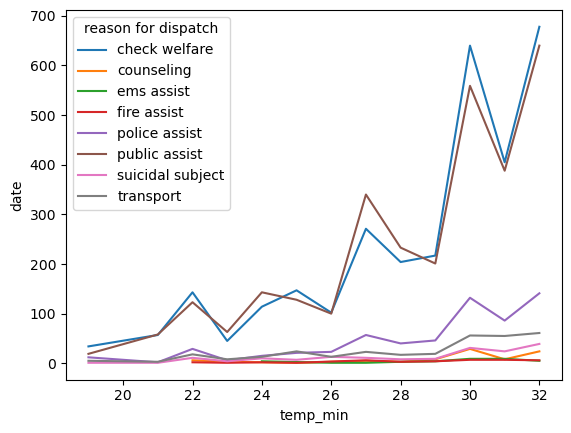

In [171]:
# looking at calls during below freeze temps
freeze_group = weather_total[weather_total['below freeze'] == True].groupby(['reason for dispatch', 'temp_min']).count().reset_index()
sns.lineplot(freeze_group[freeze_group['temp_min'] != 0], x='temp_min', y = 'date', hue = 'reason for dispatch')
freeze_group

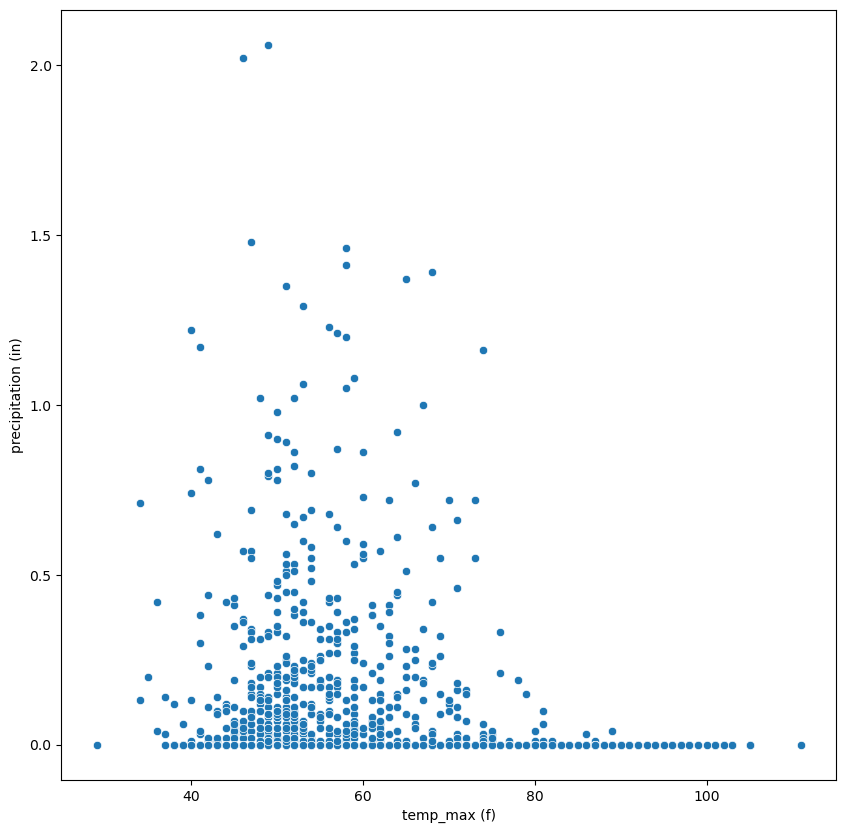

In [166]:
fig, ax = plt.subplots(figsize = (10,10))
sns.scatterplot(temp_precip, x='temp_max (f)', y= 'precipitation (in)')
plt.show()

## AQI visualization

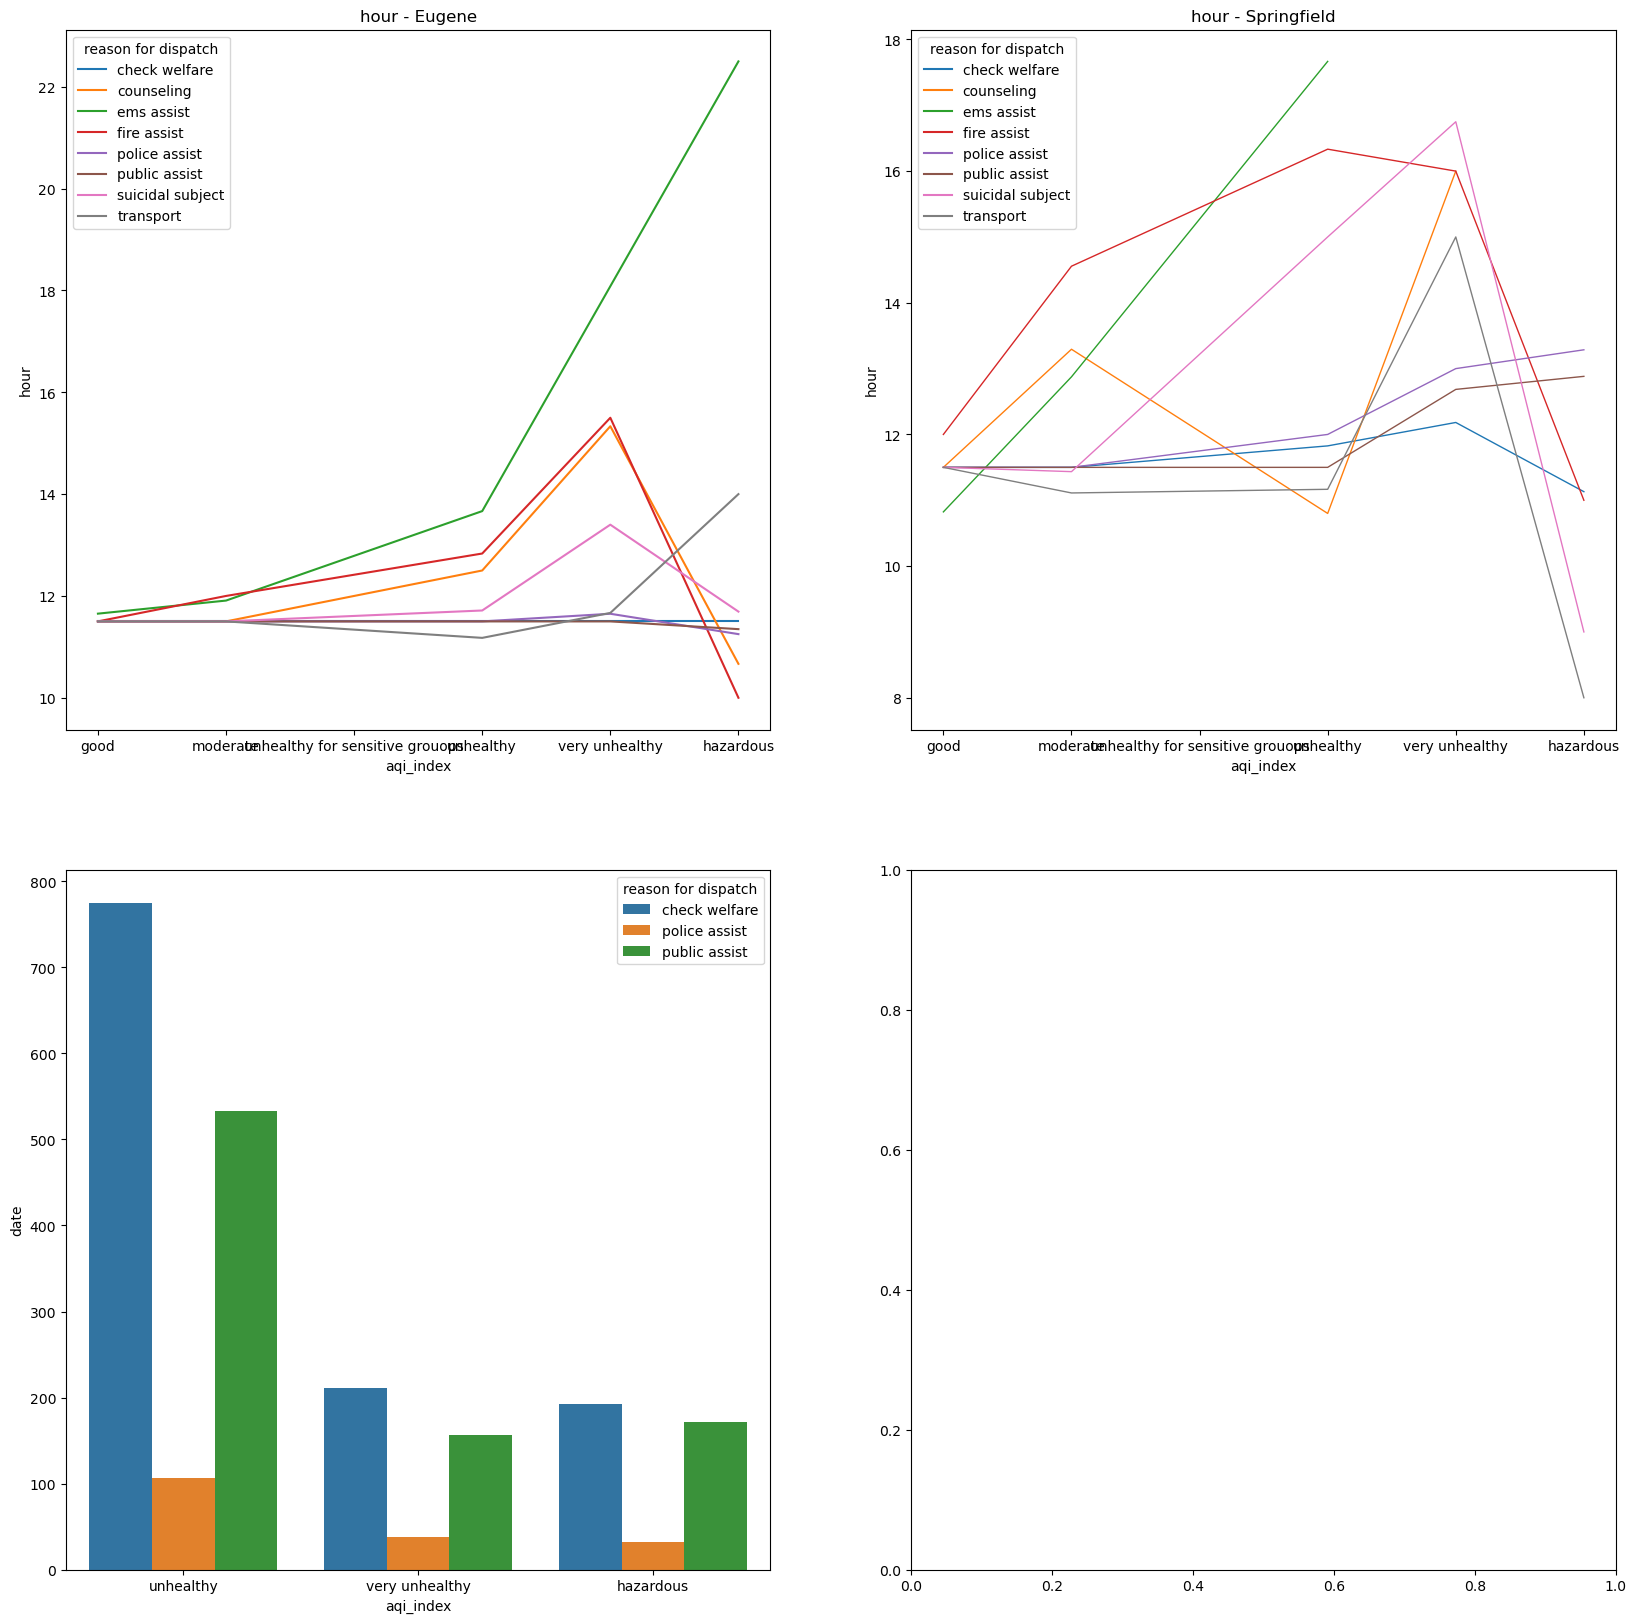

In [328]:
from pandas.api.types import CategoricalDtype


eug_hour_group = eug_aqi.groupby(['reason for dispatch', 'aqi_index', 'hour']).count().reset_index()
spr_hour_group = spr_aqi.groupby(['reason for dispatch', 'aqi_index', 'hour']).count().reset_index()
eug_aqi_group = eug_aqi.groupby(['reason for dispatch', 'aqi_index']).count().reset_index()



aqi_order = ['good', 'moderate', 'unhealthy for sensitive grouops', 'unhealthy', 'very unhealthy', 'hazardous']
category_order = CategoricalDtype(aqi_order, ordered=True)
eug_hour_group["aqi_index"]= eug_hour_group["aqi_index"].astype(category_order)
spr_hour_group["aqi_index"]= spr_hour_group["aqi_index"].astype(category_order)



eug_aqi_group_order = ['unhealthy', 'very unhealthy', 'hazardous']
cat_order = CategoricalDtype(eug_aqi_group_order, ordered=True)
eug_aqi_group["aqi_index"]= eug_aqi_group["aqi_index"].astype(cat_order)
eug_aqi_group = eug_aqi_group[(eug_aqi_group['aqi_index'] != 'good') & (eug_aqi_group['aqi_index'] != 'moderate')]

fig, ax = plt.subplots(2, 2,figsize = (20,20))
sns.lineplot(eug_hour_group, x = 'aqi_index', y='hour', hue = 'reason for dispatch', errorbar = None, ax = ax[0,0])
ax[0,0].set_title('hour - Eugene')
sns.lineplot(spr_hour_group, x='aqi_index', y='hour', hue ='reason for dispatch', errorbar = None, linewidth = 1, ax = ax[0,1])
ax[0,1].set_title('hour - Springfield')
sns.barplot(top_3(eug_aqi_group) , x = 'aqi_index', y='date', hue = 'reason for dispatch', errorbar = None, ax = ax[1,0])

plt.show()

